In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
NOTEBOOK_NAME = 'similarity_matrix_across_combined_vhpc'

In [4]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [5]:
from itertools import product

In [6]:
expo_animals = '94', '96', '98', '99', '100', '104', 'vNAc7' #c18m9 excluded due to only 14 trials of one of the odors
pre_animals =  '94', '96', '98', '99', '100', '104', 'c18m9', 'vNAc7'
post_animals = '94', '96', '98', '99', '100', '104', 'c18m9', 'vNAc7'
post_hiatus_animals = '94', '96', '98', '99', '100', '104', 'c18m9', 'vNAc7'
all_animals = '94', '96', '98', '99', '100', '104', 'c18m9', 'vNAc7'

In [7]:
delta_t05s = 0.5
t_start05s = -5.5 
t_stop05s = 10.5

delta_t1s = 1
t_start1s = -5 
t_stop1s  = 11 

In [8]:
sessions = 'pre','post','post_hiatus' #exclude expo because did not register with that session
comparison_labels='CS1','CS2','CS3','CS4'
#only going to analyze .5s and 1s bins here to save time.
bins = ['05s','1s']
bin_ranges=[]
for tb in bins:
    if tb == '05s':
        div=0.5
    else:
        div=tb[:-1]
            #print range(int(eval("(t_stop%s-t_start%s)/%s"%(tb,tb,div))))
    #for t in range(int(eval("(t_stop%s-t_start%s)/%s"%(tb,tb,div)))):
    bin_ranges.append(int(eval("(t_stop%s-t_start%s)/%s"%(tb,tb,div))))
print bin_ranges

[32, 16]


In [9]:
CR_comparisons = 'prepost','prepost_hiatus','postpost_hiatus' #exclude expo session, since did not cellreg this

In [10]:
#get patterns of cells registered across all 3 sessions
for tb in bins:
    for sess in sessions:
        exec("cellreg_patterns_%s_%s_reg_w_all = dict(zip(all_animals, [ut.load_variable('patterns_evs_reg_%s_%s_all',\
                                                               '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                      for ani in all_animals]))"%(tb,sess,tb,sess))
        exec("labels_%s = dict(zip(%s_animals, [ut.load_variable('labels_%s',\
                                                             '../%%s/notebooks/autorestore/patterns_time_bins/'%%ani)\
                                                      for ani in %s_animals]))"%(sess,sess,sess,sess))

In [11]:
min_cells_reg_all = 0
for key in cellreg_patterns_1s_pre_reg_w_all:
    min_cells_reg_all=min_cells_reg_all+np.shape(cellreg_patterns_1s_pre_reg_w_all[key])[-1]
print "cells registered across all sessions =",min_cells_reg_all

cells registered across all sessions = 102


In [12]:
#combine cells and patterns across animals
#combined for each tb should = 120xall cells
for sess in sessions:
    for tb,i in zip(bins,range(len(bins))):
        for t in range(bin_ranges[i]):
            for odor,trial in zip(comparison_labels,[1,2,3,4]):
                exec("combined_patterns_%s_%s_%s_%s=[]"%(tb,sess,t,odor))
                exec("combined_patterns_%s_%s_%s_%s = np.concatenate(([cellreg_patterns_%s_%s_reg_w_all[ani][t][labels_%s[ani]==trial]\
                  for ani in all_animals]),axis=1)"%(tb,sess,t,odor,tb,sess,sess))


#this will get correlations for each animal individually
odors= 'CSp','CSm'
tbs = range(16)
pattern_ids_expo = ['tb%s_%s_expo'%(tb,odor) for tb, odor in product(tbs, odors)]
pattern_ids_pre =  ['tb%s_%s_pre'%(tb,odor) for tb, odor in product(tbs, odors)]
pattern_ids_post = ['tb%s_%s_post'%(tb,odor) for tb, odor in product(tbs, odors)]
pattern_ids_ext1 = ['tb%s_%s_ext1'%(tb,odor) for tb, odor in product(tbs, odors)]
pattern_ids_ext2 = ['tb%s_%s_ext2'%(tb,odor) for tb, odor in product(tbs, odors)]
pattern_ids_renew =['tb%s_%s_renew'%(tb,odor) for tb, odor in product(tbs, odors)]


all_patterns_expo = [eval('combined_patterns_tb_%s_expo_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_expo, all_patterns_expo)
across_tb_res_expo=corrmat_distr
print 'expo DONE!',

all_patterns_pre = [eval('combined_patterns_tb_%s_pre_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_pre, all_patterns_pre)
across_tb_res_pre=corrmat_distr
print 'pre DONE!',


all_patterns_post = [eval('combined_patterns_tb_%s_post_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_post, all_patterns_post)
across_tb_res_post=corrmat_distr
print 'post DONE!',


all_patterns_ext1 = [eval('combined_patterns_tb_%s_ext1_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_ext1, all_patterns_ext1)
across_tb_res_ext1=corrmat_distr
print 'ext1 DONE!',


all_patterns_ext2 = [eval('combined_patterns_tb_%s_ext2_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_ext2, all_patterns_ext2)
across_tb_res_ext2=corrmat_distr
print 'ext2 DONE!',


all_patterns_renew = [eval('combined_patterns_tb_%s_renew_%s'%(tb,odor)) for tb,odor in product(tbs,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_renew, all_patterns_renew)
across_tb_res_renew=corrmat_distr
print 'renew DONE!',
    
#across_tb_res_renew = {}
#for ani in patterns_tb_renew.keys():
#    all_patterns_renew = [eval('patterns_tb_%s_renew_%s[ani]'%(tb,odor)) for tb,odor in product(tbs,odors)]
#    corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_renew, all_patterns_renew)
#    across_tb_res_renew[ani]=corrmat_distr
#    print 'renew',ani,'DONE!',


In [13]:
%%time
#this will get correlations for each animal individually (...will it, though?)
odors= 'CS1','CS2','CS3','CS4'
t = range(16)
pattern_ids_1s_pre =  ['1s_%s_%s_pre'%(tt,odor) for tt, odor in product(t,odors)]
pattern_ids_1s_post = ['1s_%s_%s_post'%(tt,odor) for tt, odor in product(t,odors)]
pattern_ids_1s_post_hiatus = ['1s_%s_%s_post_hiatus'%(tt,odor) for tt, odor in product(t,odors)]

all_patterns_1s_pre = [eval('combined_patterns_1s_pre_%s_%s'%(tt,odor)) for tt,odor in product(t,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_1s_pre, all_patterns_1s_pre)
across_tb_1s_res_pre=corrmat_distr
print 'pre DONE!',

all_patterns_1s_post = [eval('combined_patterns_1s_post_%s_%s'%(tt,odor)) for tt,odor in product(t,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_1s_post, all_patterns_1s_post)
across_tb_1s_res_post=corrmat_distr
print 'post DONE!',

all_patterns_1s_post_hiatus = [eval('combined_patterns_1s_post_hiatus_%s_%s'%(tt,odor)) for tt,odor in product(t,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_1s_post_hiatus, all_patterns_1s_post_hiatus)
across_tb_1s_res_post_hiatus=corrmat_distr
print 'post_hiatus DONE!',

## DO NO TRY THE BELOW: doesn't iterate over tt
#tb='1s'
#t=range(16)
#for sess in 'expo',:
#        exec("all_patterns_%s_%s = [combined_patterns_%s_%s_%s_%s for tt,odor in product(t,odors)]"%(tb,sess,tb,sess,tt,odor))
#        corrmat_distr, corrmat = ut.compute_similarity_matrix(eval("pattern_ids_%s_%s"%(tb,sess)), eval("all_patterns_%s_%s"%(tb,sess)))
#        exec("across_tb_%s_res_%s=corrmat_distr"%(tb,sess))
#        print '%s DONE!'%sess,

pre DONE! post DONE! post_hiatus DONE!CPU times: user 9min 59s, sys: 1min 19s, total: 11min 19s
Wall time: 10min



In [20]:
%%time
#get correlations across sessions
odors= 'CS1','CS2','CS3','CS4'
t = range(16)

#combine ids of each session pair
pattern_ids_1s_prepost  =  np.append(pattern_ids_1s_pre,pattern_ids_1s_post,axis=0)   
pattern_ids_1s_prepost_hiatus  =  np.append(pattern_ids_1s_pre,pattern_ids_1s_post_hiatus,axis=0)   
pattern_ids_1s_postpost_hiatus  =  np.append(pattern_ids_1s_post,pattern_ids_1s_post_hiatus,axis=0)   

#cmobine patterns of each session pair
all_patterns_1s_prepost = np.append(all_patterns_1s_pre,all_patterns_1s_post,axis=0)   
all_patterns_1s_prepost_hiatus = np.append(all_patterns_1s_pre,all_patterns_1s_post_hiatus,axis=0)  
all_patterns_1s_postpost_hiatus = np.append(all_patterns_1s_post,all_patterns_1s_post_hiatus,axis=0)  

#run the correlation
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_1s_prepost, all_patterns_1s_prepost)
across_tb_res_1s_prepost=corrmat_distr
print 'pre vs post DONE!',

corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_1s_prepost_hiatus, all_patterns_1s_prepost_hiatus)
across_tb_res_1s_prepost_hiatus=corrmat_distr
print 'pre vs post_hiatus DONE!',

corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_1s_postpost_hiatus, all_patterns_1s_postpost_hiatus)
across_tb_res_1s_postpost_hiatus=corrmat_distr
print 'post vs post_hiatus DONE!',

pre vs post DONE! pre vs post_hiatus DONE! post vs post_hiatus DONE!CPU times: user 38min 20s, sys: 5min 5s, total: 43min 26s
Wall time: 38min 12s



In [23]:
%%time
get within-session correlations for 0.5s time bins
t = range(32)
pattern_ids_05s_pre =  ['05s_%s_%s_pre'%(tt,odor) for tt, odor in product(t,odors)]
pattern_ids_05s_post = ['05s_%s_%s_post'%(tt,odor) for tt, odor in product(t,odors)]
pattern_ids_05s_post_hiatus = ['05s_%s_%s_post_hiatus'%(tt,odor) for tt, odor in product(t,odors)]

all_patterns_05s_pre = [eval('combined_patterns_05s_pre_%s_%s'%(tt,odor)) for tt,odor in product(t,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_05s_pre, all_patterns_05s_pre)
across_tb_05s_res_pre=corrmat_distr
print 'pre DONE!',

all_patterns_05s_post = [eval('combined_patterns_05s_post_%s_%s'%(tt,odor)) for tt,odor in product(t,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_05s_post, all_patterns_05s_post)
across_tb_05s_res_post=corrmat_distr
print 'post DONE!',

all_patterns_05s_post_hiatus = [eval('combined_patterns_05s_post_hiatus_%s_%s'%(tt,odor)) for tt,odor in product(t,odors)]
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_05s_post_hiatus, all_patterns_05s_post_hiatus)
across_tb_05s_res_post_hiatus=corrmat_distr
print 'post_hiatus DONE!',

 post_hiatus DONE!CPU times: user 12min 41s, sys: 1min 41s, total: 14min 23s
Wall time: 12min 37s



In [30]:
%%time
#get correlations across sessions for 0.5s time bins
odors= 'CS1','CS2','CS3','CS4'
t = range(32)

#combine ids of each session pair
pattern_ids_05s_prepost  =  np.append(pattern_ids_05s_pre,pattern_ids_05s_post,axis=0)   
pattern_ids_05s_prepost_hiatus  =  np.append(pattern_ids_05s_pre,pattern_ids_05s_post_hiatus,axis=0)   
pattern_ids_05s_postpost_hiatus  =  np.append(pattern_ids_05s_post,pattern_ids_05s_post_hiatus,axis=0)   

#cmobine patterns of each session pair
all_patterns_05s_prepost = np.append(all_patterns_05s_pre,all_patterns_05s_post,axis=0)   
all_patterns_05s_prepost_hiatus = np.append(all_patterns_05s_pre,all_patterns_05s_post_hiatus,axis=0)  
all_patterns_05s_postpost_hiatus = np.append(all_patterns_05s_post,all_patterns_05s_post_hiatus,axis=0)  

#run the correlation
corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_05s_prepost, all_patterns_05s_prepost)
across_tb_res_05s_prepost=corrmat_distr
print 'prepost DONE!',

corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_05s_prepost_hiatus, all_patterns_05s_prepost_hiatus)
across_tb_res_05s_prepost_hiatus=corrmat_distr
print 'prepost DONE!',

corrmat_distr, corrmat = ut.compute_similarity_matrix(pattern_ids_05s_postpost_hiatus, all_patterns_05s_postpost_hiatus)
across_tb_res_05s_postpost_hiatus=corrmat_distr
print 'prepost DONE!',

prepost DONE! prepost DONE! prepost DONE!CPU times: user 2h 31min 10s, sys: 21min 26s, total: 2h 52min 37s
Wall time: 2h 32min 11s



In [24]:
#make matrix of all comparisons across tbs
for tb,i in zip(bins,range(len(bins))):
    for tb1 in range(bin_ranges[i]):
        for sess in sessions:
            for odor in odors:
                exec("matrix_%s_%s_%s_%s = []"%(tb,sess,odor,tb1))
                exec("matrix_%s_%s_%s_%s_all = []"%(tb,sess,odor,tb1))
                for tb2 in range(bin_ranges[i]):
                    #get mean values across all animals
                    eval("matrix_%s_%s_%s_%s"%(tb,sess,odor,tb1)).insert(tb2,eval("np.mean(across_tb_%s_res_%s['%s_%s_%s_%s','%s_%s_%s_%s'])\
                        "%(tb,sess,tb,tb1,odor,sess,tb,tb2,odor,sess,)))
                    eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor,tb1)).insert(tb2,eval("across_tb_%s_res_%s['%s_%s_%s_%s','%s_%s_%s_%s']\
                        "%(tb,sess,tb,tb1,odor,sess,tb,tb2,odor,sess,)))

In [32]:
#make matrix of all comparisons across tbs for across-session data
for tb,i in zip(bins,range(len(bins))):
    for tb1 in range(bin_ranges[i]):
        for sess,split in zip(CR_comparisons,[3,3,4]): #this is what's diff from above. split is for separating session labels via slice index
            for odor in odors:
                exec("matrix_%s_%s_%s_%s = []"%(tb,sess,odor,tb1))
                exec("matrix_%s_%s_%s_%s_all = []"%(tb,sess,odor,tb1))
                for tb2 in range(bin_ranges[i]):
                    #get mean values across all animals
                    eval("matrix_%s_%s_%s_%s"%(tb,sess,odor,tb1)).insert(tb2,eval("np.mean(across_tb_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s'])\
                        "%(tb,sess,tb,tb1,odor,sess[split:],tb,tb2,odor,sess[:split])))
                    eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor,tb1)).insert(tb2,eval("across_tb_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s']\
                        "%(tb,sess,tb,tb1,odor,sess[split:],tb,tb2,odor,sess[:split])))

In [25]:
#make matrix of all across-odor comparisons across tbs
for tb,i in zip(bins,range(len(bins))):
    for odor_comp in 'CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4':
        for tb1 in range(bin_ranges[i]):
            for sess in sessions:
                    exec("matrix_%s_%s_%s_%s = []"%(tb,sess,odor_comp,tb1))
                    exec("matrix_%s_%s_%s_%s_all = []"%(tb,sess,odor_comp,tb1))
                    for tb2 in range(bin_ranges[i]):
                        #get mean values across all animals
                        eval("matrix_%s_%s_%s_%s"%(tb,sess,odor_comp,tb1)).insert(tb2,eval("np.mean(across_tb_%s_res_%s['%s_%s_%s_%s','%s_%s_%s_%s'])\
                            "%(tb,sess,tb,tb1,odor_comp.split('v')[0],sess,tb,tb2,odor_comp.split('v')[-1],sess)))
                        eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor_comp,tb1)).insert(tb2,eval("across_tb_%s_res_%s['%s_%s_%s_%s','%s_%s_%s_%s']\
                            "%(tb,sess,tb,tb1,odor_comp.split('v')[0],sess,tb,tb2,odor_comp.split('v')[-1],sess)))

In [33]:
#make matrix of all across-odor comparisons across tbs for across-session correlations
for tb,i in zip(bins,range(len(bins))):
    for odor_comp in 'CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4':
        for tb1 in range(bin_ranges[i]):
            for sess,split in zip(CR_comparisons,[3,3,4]): #this is what's diff from above. split is for separating session labels via slice index
                    exec("matrix_%s_%s_%s_%s = []"%(tb,sess,odor_comp,tb1))
                    exec("matrix_%s_%s_%s_%s_all = []"%(tb,sess,odor_comp,tb1))
                    for tb2 in range(bin_ranges[i]):
                        #get mean values across all animals
                        eval("matrix_%s_%s_%s_%s"%(tb,sess,odor_comp,tb1)).insert(tb2,eval("np.mean(across_tb_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s'])\
                            "%(tb,sess,tb,tb1,odor_comp.split('v')[0],sess[split:],tb,tb2,odor_comp.split('v')[-1],sess[:split])))
                        eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor_comp,tb1)).insert(tb2,eval("across_tb_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s']\
                            "%(tb,sess,tb,tb1,odor_comp.split('v')[0],sess[split:],tb,tb2,odor_comp.split('v')[-1],sess[:split])))

In [26]:
#get standard deviation and standard error for individual trial vs trial comparisons
import math
for tb,i in zip(bins,range(len(bins))):
    for odor_comp in 'CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4':
        for t in range(bin_ranges[i]):
            for sess in sessions:
                exec("matrix_%s_%s_%s_%s_std = []"%(tb,sess,odor_comp,t))
                exec("matrix_%s_%s_%s_%s_err = []"%(tb,sess,odor_comp,t))
                for x in range(len(eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor_comp,t)))):
                        exec("matrix_%s_%s_%s_%s_std.append(np.std(matrix_%s_%s_%s_%s_all[x]))"%(tb,sess,odor_comp,t,tb,sess,odor_comp,t))
                        exec("matrix_%s_%s_%s_%s_err.append(np.std(matrix_%s_%s_%s_%s_all[x])/(math.sqrt(len(matrix_%s_%s_%s_%s_all[x]))))"%(tb,sess,odor_comp,t,tb,sess,odor_comp,t,tb,sess,odor_comp,t))
                for odor in odors:
                    exec("matrix_%s_%s_%s_%s_std = []"%(tb,sess,odor,t))
                    exec("matrix_%s_%s_%s_%s_err = []"%(tb,sess,odor,t))
                    for x in range(len(eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor,t)))):
                        exec("matrix_%s_%s_%s_%s_std.append(np.std(matrix_%s_%s_%s_%s_all[x]))"%(tb,sess,odor,t,tb,sess,odor,t))
                        exec("matrix_%s_%s_%s_%s_err.append(np.std(matrix_%s_%s_%s_%s_all[x])/(math.sqrt(len(matrix_%s_%s_%s_%s_all[x]))))"%(tb,sess,odor,t,tb,sess,odor,t,tb,sess,odor,t))

In [34]:
#get standard deviation and standard error for individual trial vs trial comparisons for across-session data
import math
for tb,i in zip(bins,range(len(bins))):
    for odor_comp in 'CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4':
        for t in range(bin_ranges[i]):
            for sess in CR_comparisons:
                exec("matrix_%s_%s_%s_%s_std = []"%(tb,sess,odor_comp,t))
                exec("matrix_%s_%s_%s_%s_err = []"%(tb,sess,odor_comp,t))
                for x in range(len(eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor_comp,t)))):
                        exec("matrix_%s_%s_%s_%s_std.append(np.std(matrix_%s_%s_%s_%s_all[x]))"%(tb,sess,odor_comp,t,tb,sess,odor_comp,t))
                        exec("matrix_%s_%s_%s_%s_err.append(np.std(matrix_%s_%s_%s_%s_all[x])/(math.sqrt(len(matrix_%s_%s_%s_%s_all[x]))))"%(tb,sess,odor_comp,t,tb,sess,odor_comp,t,tb,sess,odor_comp,t))
                for odor in odors:
                    exec("matrix_%s_%s_%s_%s_std = []"%(tb,sess,odor,t))
                    exec("matrix_%s_%s_%s_%s_err = []"%(tb,sess,odor,t))
                    for x in range(len(eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor,t)))):
                        exec("matrix_%s_%s_%s_%s_std.append(np.std(matrix_%s_%s_%s_%s_all[x]))"%(tb,sess,odor,t,tb,sess,odor,t))
                        exec("matrix_%s_%s_%s_%s_err.append(np.std(matrix_%s_%s_%s_%s_all[x])/(math.sqrt(len(matrix_%s_%s_%s_%s_all[x]))))"%(tb,sess,odor,t,tb,sess,odor,t,tb,sess,odor,t))

In [27]:
for tb,i in zip(bins,range(len(bins))):
    for sess in sessions:
        for trial in ['CS1','CS2','CS3','CS4','CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4']:
            exec("big_matrix_%s_%s_%s = []"%(tb,sess,trial))
            for t in range(bin_ranges[i]):
                eval("big_matrix_%s_%s_%s"%(tb,sess,trial)).append(eval("matrix_%s_%s_%s_%s"%(tb,sess,trial,t)))

In [35]:
for tb,i in zip(bins,range(len(bins))):
    for sess in CR_comparisons:
        for trial in ['CS1','CS2','CS3','CS4','CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4']:
            exec("big_matrix_%s_%s_%s = []"%(tb,sess,trial))
            for t in range(bin_ranges[i]):
                eval("big_matrix_%s_%s_%s"%(tb,sess,trial)).append(eval("matrix_%s_%s_%s_%s"%(tb,sess,trial,t)))

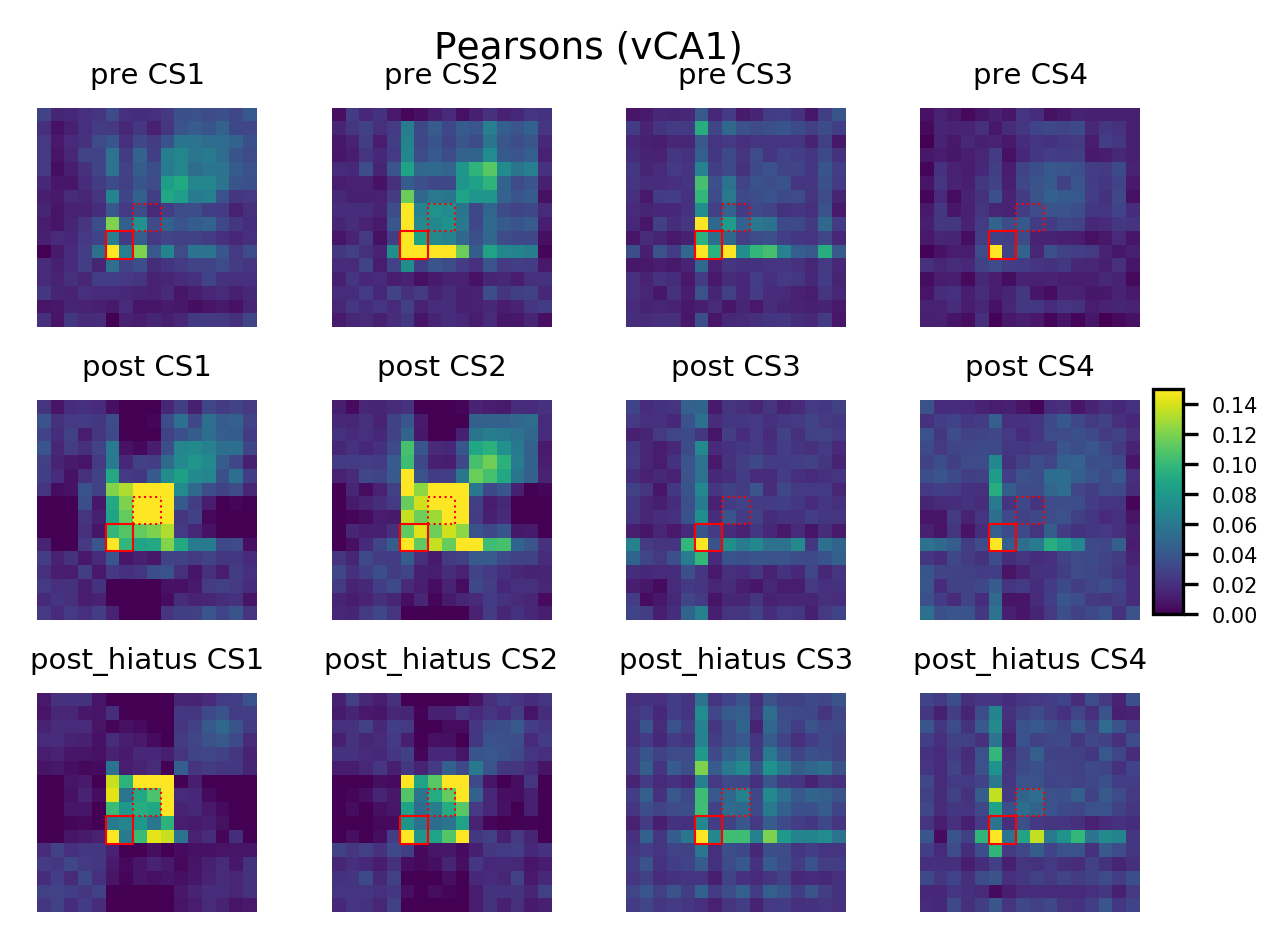

In [37]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(3,4,figsize=(4,3))
for sess,r in zip(sessions,range(len(sessions))):
    for trial,c in zip(['CS1','CS2','CS3','CS4'],[0,1,2,3]):
        im=axs[r][c].imshow(eval("big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+" "+trial,fontsize=7)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1)',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

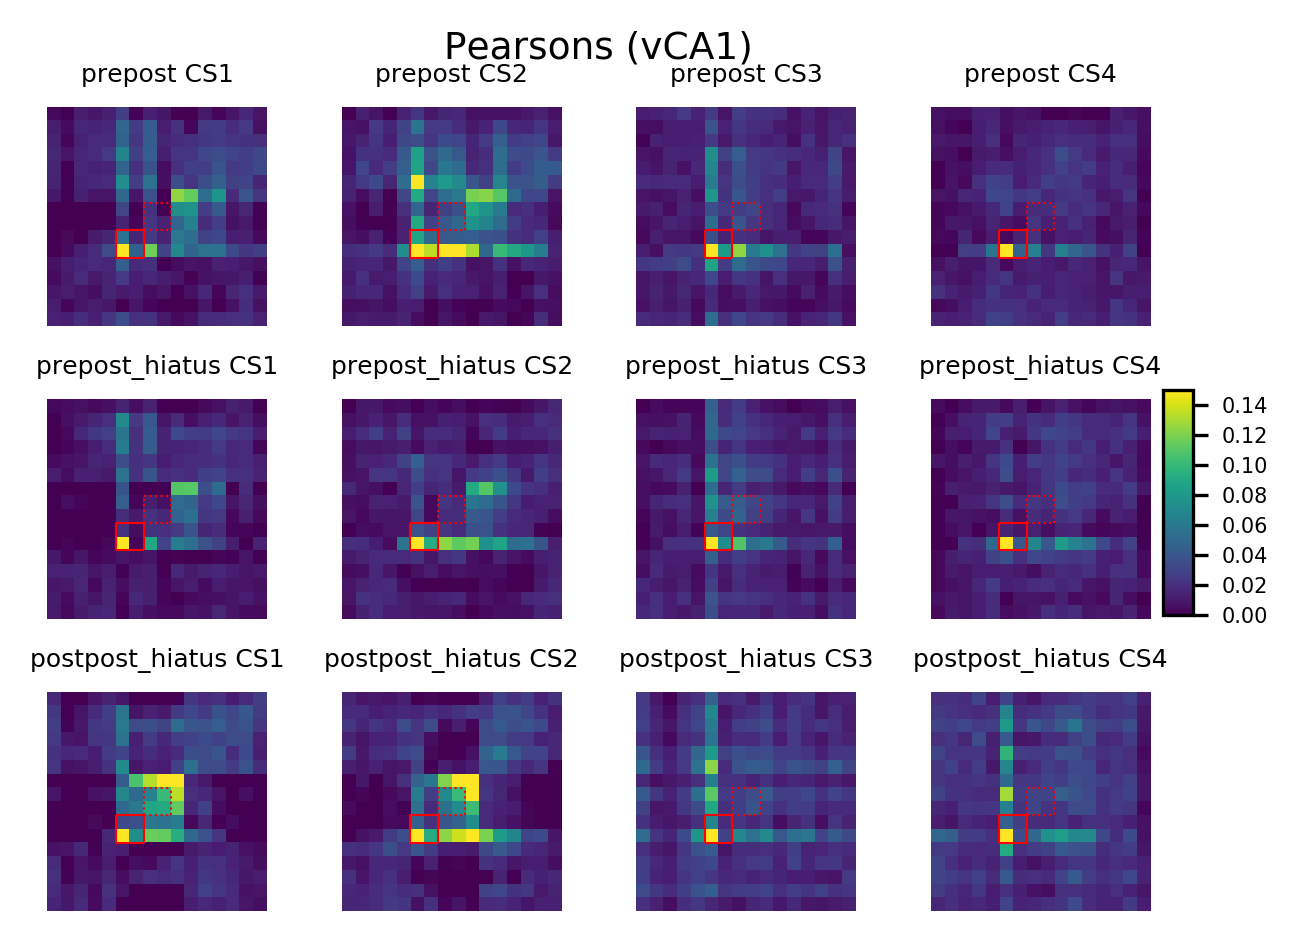

In [38]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(3,4,figsize=(4,3))
for sess,r in zip(CR_comparisons,range(len(CR_comparisons))):
    for trial,c in zip(['CS1','CS2','CS3','CS4'],[0,1,2,3]):
        im=axs[r][c].imshow(eval("big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+" "+trial,fontsize=6)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1)',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

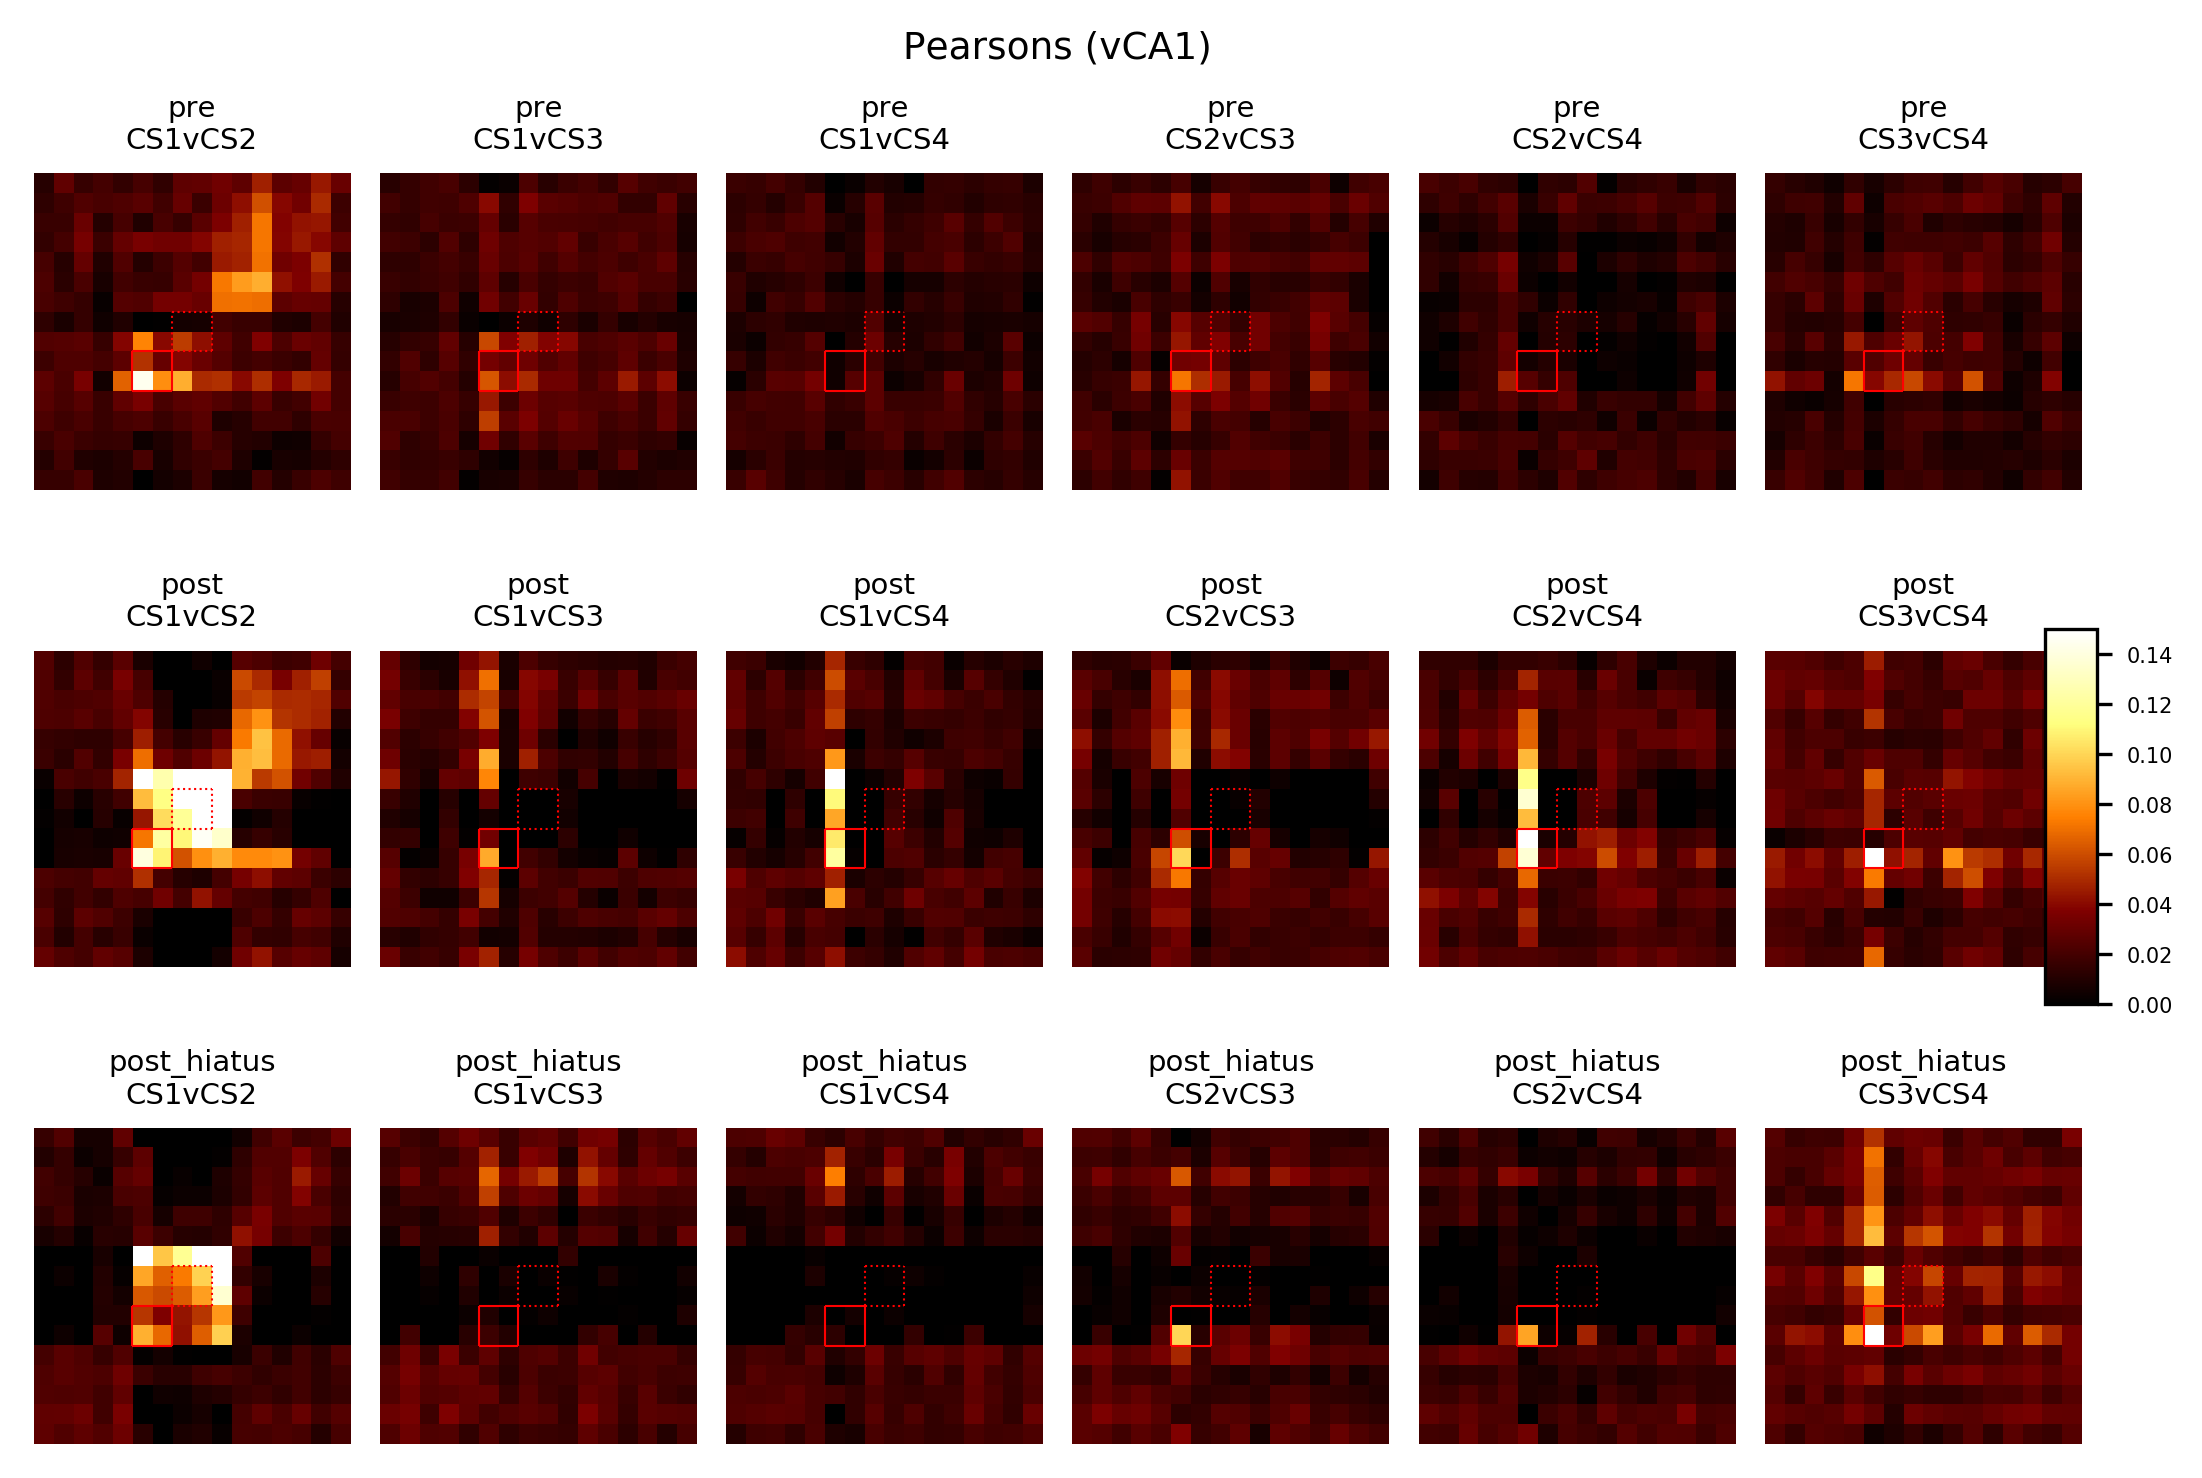

In [131]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(3,6,figsize=(7,5))
for sess,r in zip(sessions,range(len(sessions))):
    for trial,c in zip(['CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4'],[0,1,2,3,4,5]):
        im=axs[r][c].imshow(eval("big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15,cmap='afmhot')
        axs[r][c].set_title(sess+"\n"+trial,fontsize=7)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1)',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

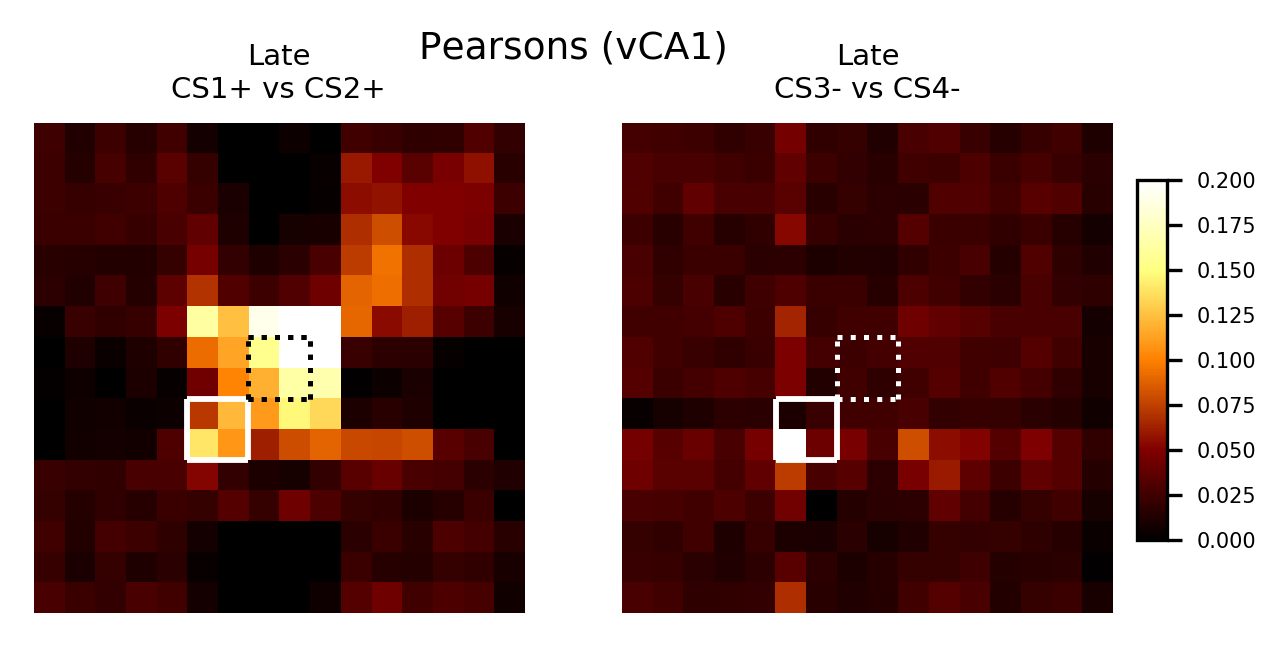

In [151]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(1,2,figsize=(4,2))
sess='post'
r=0
for trial,trial_la,c in zip(['CS1vCS2','CS3vCS4'],['CS1+ vs CS2+','CS3- vs CS4-'],[0,1]):
        im=axs[c].imshow(eval("big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=0.0, vmax=0.2,cmap='afmhot')
        axs[c].set_title("Late\n"+trial_la,fontsize=7)
        axs[c].vlines(4.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].hlines(4.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].vlines(6.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].hlines(6.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].vlines(6.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[c].hlines(6.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[c].vlines(8.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[c].hlines(8.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[0].vlines(6.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        axs[0].hlines(6.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        axs[0].vlines(8.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        axs[0].hlines(8.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        pt.remove_axes(axs[c])
pl.suptitle('Pearsons (vCA1)',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.16, 0.025, 0.6])
pl.colorbar(im,cax=cax)

fig.tight_layout()
fig.savefig("../figures/%s_Po_hm.pdf"%NOTEBOOK_NAME)

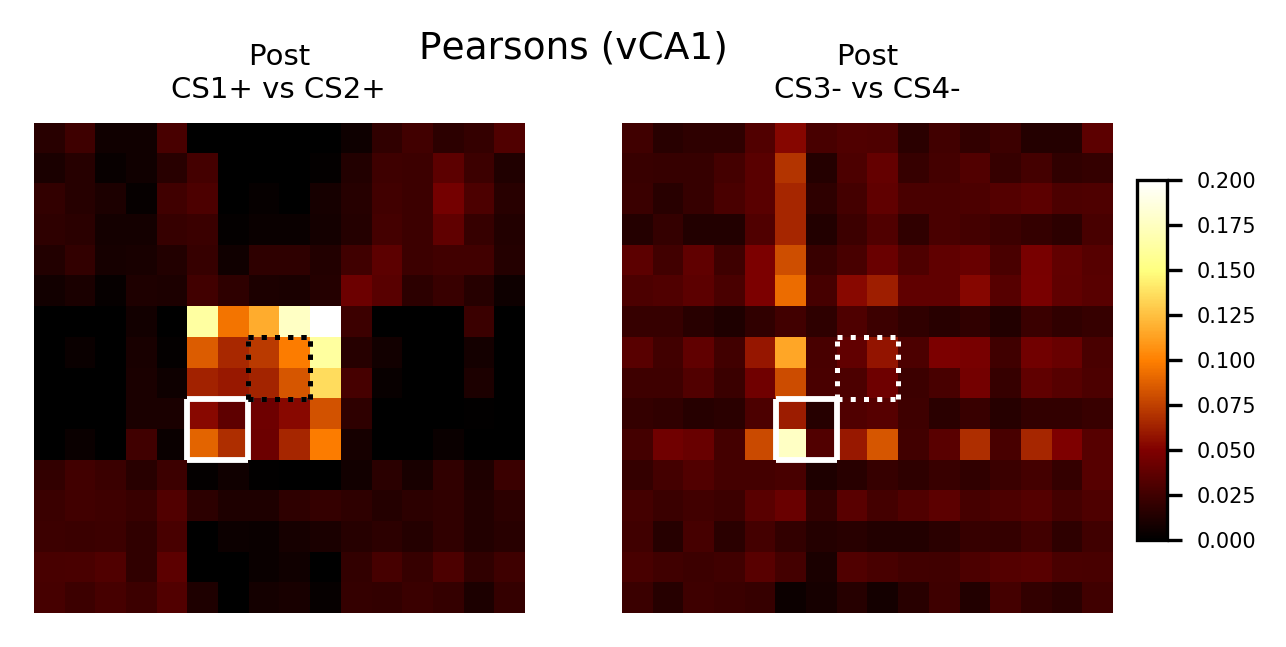

In [152]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(1,2,figsize=(4,2))
sess='post_hiatus'
r=0
for trial,trial_la,c in zip(['CS1vCS2','CS3vCS4'],['CS1+ vs CS2+','CS3- vs CS4-'],[0,1]):
        im=axs[c].imshow(eval("big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=0.0, vmax=0.2,cmap='afmhot')
        axs[c].set_title("Post\n"+trial_la,fontsize=7)
        axs[c].vlines(4.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].hlines(4.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].vlines(6.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].hlines(6.5,4.5,6.5,color='w',linewidth=1.4)
        axs[c].vlines(6.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[c].hlines(6.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[c].vlines(8.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[c].hlines(8.5,6.5,8.5,color='w',linestyle=':',linewidth=1.2)
        axs[0].vlines(6.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        axs[0].hlines(6.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        axs[0].vlines(8.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        axs[0].hlines(8.5,6.5,8.5,color='k',linestyle=':',linewidth=1.2)
        pt.remove_axes(axs[c])
pl.suptitle('Pearsons (vCA1)',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.16, 0.025, 0.6])
pl.colorbar(im,cax=cax)

fig.tight_layout()
fig.savefig("../figures/%s_Hi_hm.pdf"%NOTEBOOK_NAME)

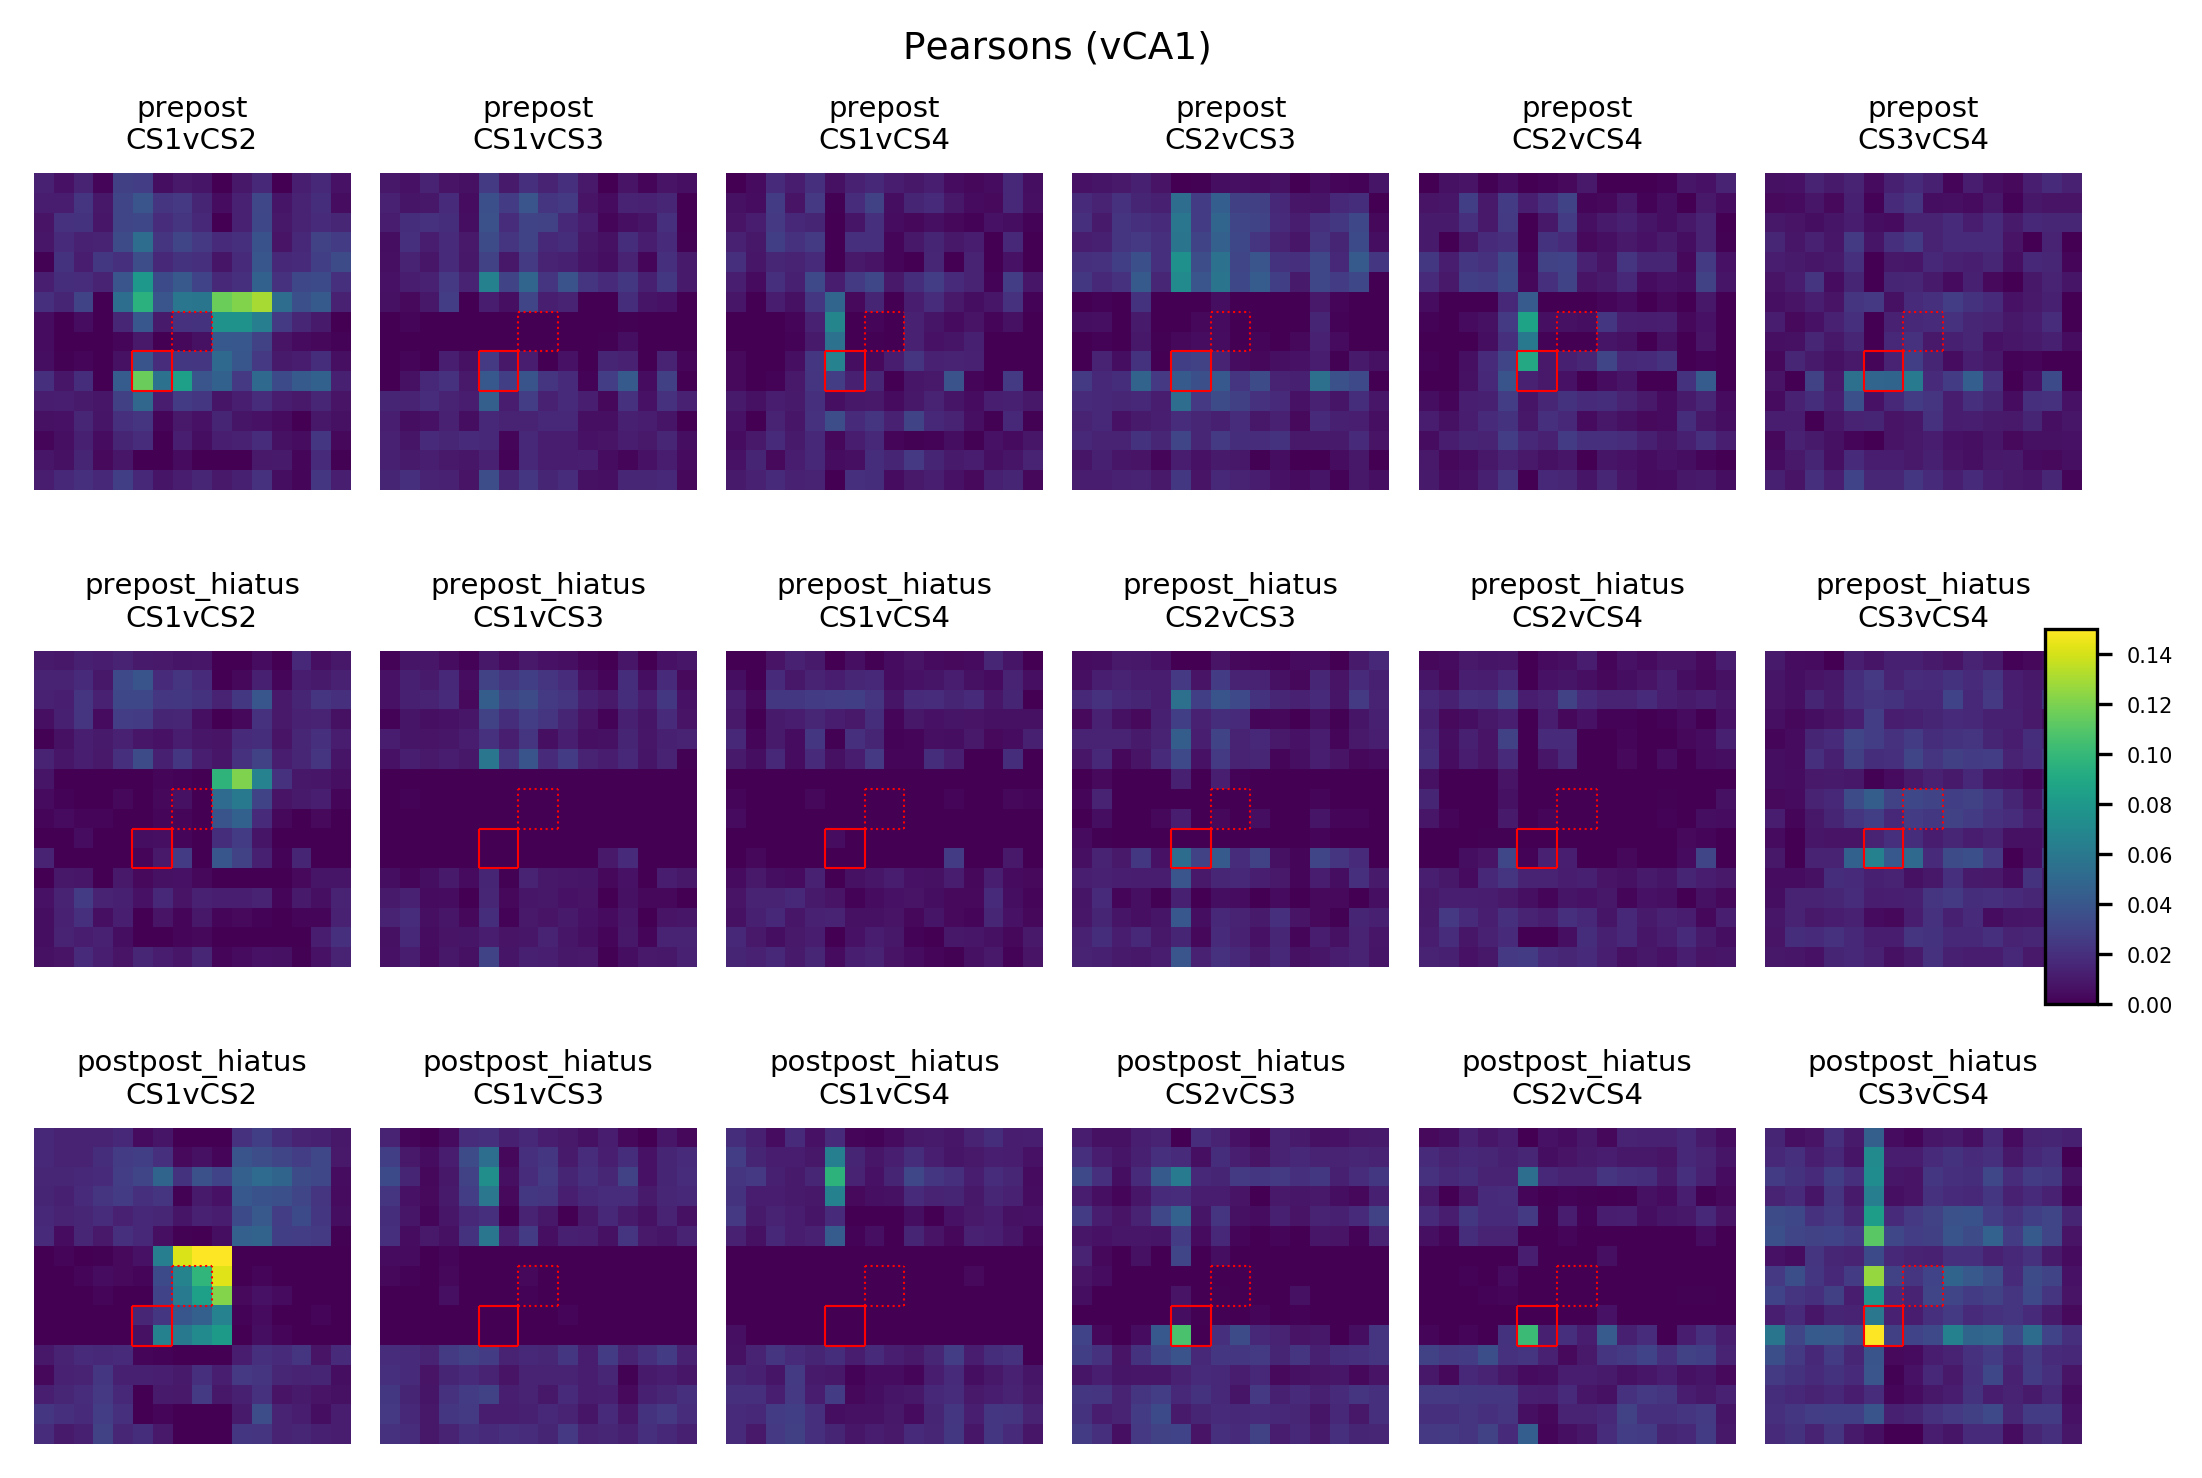

In [40]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(3,6,figsize=(7,5))
for sess,r in zip(CR_comparisons,range(len(CR_comparisons))):
    for trial,c in zip(['CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4'],[0,1,2,3,4,5]):
        im=axs[r][c].imshow(eval("big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+"\n"+trial,fontsize=7)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1)',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

In [ ]:
#import seaborn as sns
#%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')
#
#fig, ax = pl.subplots(1, 1, figsize=(4, 2))
#
#pairs_to_plot = [('tb14_CSp_expo', 'tb14_CSp_expo'),
#                 ('tb14_CSp_expo', 'tb15_CSp_expo'),
#                 ('tb14_CSp_expo', 'tb1_CSp_expo'),
#                 ('tb14_CSm_expo', 'tb14_CSm_expo'),
#                 ('tb14_CSm_expo', 'tb15_CSm_expo'),
#                 ('tb14_CSm_expo', 'tb1_CSm_expo')]
#values = [across_tb_res_expo[p] for p in pairs_to_plot]
#avg_values = [np.mean(across_tb_res_expo[p]) for p in pairs_to_plot]
##seaborn for individual points with jitter
#sns.set(style="white", color_codes=False)
#sns.stripplot(data=values,jitter=True,edgecolor=None,size=2,alpha=.5)
#sns.despine()
#
##colors = np.repeat(['b', 'r', 'silver', 'grey', 'y'], len(values)/5).tolist()
## pt.plot_violins(values, ax=ax, colors=colors)
##positions = range(len(values))
##[ax.plot([p]*len(v), v, 'o', mew=0, ms=2, color=c, alpha=0.5, zorder=0) for p, v, c in zip(positions, values, colors)]
#
#pt.plot_bars(values, ax=ax, stderr=True)
##pl.bar(range(len(avg_values)),avg_values)
## [b.set_color(c) for b, c in zip(bp['boxes'], colors)]
## [b.set_color(c) for b, c in zip(bp['whiskers'], np.repeat(colors, 2))]
## [b.set_color(c) for b, c in zip(bp['caps'], np.repeat(colors, 2))]
#
#ax.set_xticks(range(len(values)))
#ax.set_xticklabels(['%s\n%s'%(p[0][2:8], p[1][2:8]) for p in pairs_to_plot], fontsize=5)
##ax.set_xlabel('Pre       Post               Ext1               Ext2           Renew', fontsize=7)
##ax.set_ylim(-0.05, 0.5)
#ax.set_ylabel("Pattern similarity")
#pt.nicer_plot(ax)
#
#fig.tight_layout()
#
#ax.set_title('Pearsons correlation')
##fig.savefig("../img/similarity_CSp_dhpc_JSB.jpg")

### just do correlations on the middle 15 trials

#don't need to do this because when do across-session below, are also doing within session
%%time
#For mid trials, take beginning with trial 8)
for tb in bins:
    for sess in sessions: 
        exec("mid_patterns_%s_%s=[]"%(tb,sess))
        for x in range(len(eval("all_patterns_%s_%s"%(tb,sess)))):
            exec("mid_patterns_%s_%s.append(all_patterns_%s_%s[x][8:23])"%(tb,sess,tb,sess))
        
        corrmat_distr, corrmat = ut.compute_similarity_matrix(eval("pattern_ids_%s_%s"%(tb,sess)),eval("mid_patterns_%s_%s"%(tb,sess)))
        exec("mid_res_%s_%s=corrmat_distr"%(tb,sess))
        print '%s DONE!'%sess,

In [41]:
%%time
#For mid trials, take beginning with trial 8)
for tb in bins:
    for sess in CR_comparisons: 
        exec("mid_patterns_%s_%s=[]"%(tb,sess))
        for x in range(len(eval("all_patterns_%s_%s"%(tb,sess)))):
            exec("mid_patterns_%s_%s.append(all_patterns_%s_%s[x][8:23])"%(tb,sess,tb,sess))
        
        corrmat_distr, corrmat = ut.compute_similarity_matrix(eval("pattern_ids_%s_%s"%(tb,sess)),eval("mid_patterns_%s_%s"%(tb,sess)))
        exec("mid_res_%s_%s=corrmat_distr"%(tb,sess))
        print '%s DONE!'%sess,

prepost DONE! prepost_hiatus DONE! postpost_hiatus DONE! prepost DONE! prepost_hiatus DONE! postpost_hiatus DONE!CPU times: user 47min 7s, sys: 5min, total: 52min 7s
Wall time: 47min



In [53]:
#make matrix of all comparisons across tbs within a session
for tb,i in zip(bins,range(len(bins))):
    for tb1 in range(bin_ranges[i]):
        for sess,w_sess in zip(['prepost','postpost_hiatus','postpost_hiatus'],['pre','post','post_hiatus']):
            for odor in odors:
                exec("mid_matrix_%s_%s_%s_%s = []"%(tb,w_sess,odor,tb1))
                exec("mid_matrix_%s_%s_%s_%s_all = []"%(tb,w_sess,odor,tb1))
                for tb2 in range(bin_ranges[i]):
                    #get mean values across all animals
                    eval("mid_matrix_%s_%s_%s_%s"%(tb,w_sess,odor,tb1)).insert(tb2,eval("np.mean(mid_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s'])\
                        "%(tb,sess,tb,tb1,odor,w_sess,tb,tb2,odor,w_sess)))
                    eval("mid_matrix_%s_%s_%s_%s_all"%(tb,w_sess,odor,tb1)).insert(tb2,eval("mid_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s']\
                        "%(tb,sess,tb,tb1,odor,w_sess,tb,tb2,odor,w_sess)))

In [54]:
#make matrix of all comparisons across tbs
for tb,i in zip(bins,range(len(bins))):
    for tb1 in range(bin_ranges[i]):
        for sess,split in zip(CR_comparisons,[3,3,4]): #this is what's diff from above. split is for separating session labels via slice index
            for odor in odors:
                exec("mid_matrix_%s_%s_%s_%s = []"%(tb,sess,odor,tb1))
                exec("mid_matrix_%s_%s_%s_%s_all = []"%(tb,sess,odor,tb1))
                for tb2 in range(bin_ranges[i]):
                    #get mean values across all animals
                    eval("mid_matrix_%s_%s_%s_%s"%(tb,sess,odor,tb1)).insert(tb2,eval("np.mean(mid_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s'])\
                        "%(tb,sess,tb,tb1,odor,sess[split:],tb,tb2,odor,sess[:split])))
                    eval("mid_matrix_%s_%s_%s_%s_all"%(tb,sess,odor,tb1)).insert(tb2,eval("mid_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s']\
                        "%(tb,sess,tb,tb1,odor,sess[split:],tb,tb2,odor,sess[:split])))

In [55]:
#make matrix of all odor comparisons across tbs within session
for tb,i in zip(bins,range(len(bins))):
    for odor_comp in 'CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4':
        for tb1 in range(bin_ranges[i]):
            for sess,w_sess in zip(['prepost','postpost_hiatus','postpost_hiatus'],['pre','post','post_hiatus']):
                exec("mid_matrix_%s_%s_%s_%s = []"%(tb,w_sess,odor_comp,tb1))
                exec("mid_matrix_%s_%s_%s_%s_all = []"%(tb,w_sess,odor_comp,tb1))
                for tb2 in range(bin_ranges[i]):
                    #get mean values across all animals
                    eval("mid_matrix_%s_%s_%s_%s"%(tb,w_sess,odor_comp,tb1)).insert(tb2,eval("np.mean(mid_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s'])\
                        "%(tb,sess,tb,tb1,odor_comp.split('v')[0],w_sess,tb,tb2,odor_comp.split('v')[-1],w_sess)))
                    eval("mid_matrix_%s_%s_%s_%s_all"%(tb,w_sess,odor_comp,tb1)).insert(tb2,eval("mid_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s']\
                        "%(tb,sess,tb,tb1,odor_comp.split('v')[0],w_sess,tb,tb2,odor_comp.split('v')[-1],w_sess)))

In [56]:
#make matrix of all odor comparisons across tbs
for tb,i in zip(bins,range(len(bins))):
    for odor_comp in 'CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4':
        for tb1 in range(bin_ranges[i]):
            for sess,split in zip(CR_comparisons,[3,3,4]): #this is what's diff from above. split is for separating session labels via slice index
                exec("mid_matrix_%s_%s_%s_%s = []"%(tb,sess,odor_comp,tb1))
                exec("mid_matrix_%s_%s_%s_%s_all = []"%(tb,sess,odor_comp,tb1))
                for tb2 in range(bin_ranges[i]):
                    #get mean values across all animals
                    eval("mid_matrix_%s_%s_%s_%s"%(tb,sess,odor_comp,tb1)).insert(tb2,eval("np.mean(mid_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s'])\
                        "%(tb,sess,tb,tb1,odor_comp.split('v')[0],sess[split:],tb,tb2,odor_comp.split('v')[-1],sess[:split])))
                    eval("mid_matrix_%s_%s_%s_%s_all"%(tb,sess,odor_comp,tb1)).insert(tb2,eval("mid_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s']\
                        "%(tb,sess,tb,tb1,odor_comp.split('v')[0],sess[split:],tb,tb2,odor_comp.split('v')[-1],sess[:split])))

In [57]:
#get standard deviation and standard error for individual trial vs trial comparisons
import math
for tb,i in zip(bins,range(len(bins))):
    for odor_comp in 'CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4':
        for t in range(bin_ranges[i]):
            for sess in sessions:
                exec("mid_matrix_%s_%s_%s_%s_std = []"%(tb,sess,odor_comp,t))
                exec("mid_matrix_%s_%s_%s_%s_err = []"%(tb,sess,odor_comp,t))
                for x in range(len(eval("mid_matrix_%s_%s_%s_%s_all"%(tb,sess,odor_comp,t)))):
                        exec("mid_matrix_%s_%s_%s_%s_std.append(np.std(mid_matrix_%s_%s_%s_%s_all[x]))"%(tb,sess,odor_comp,t,tb,sess,odor_comp,t))
                        exec("mid_matrix_%s_%s_%s_%s_err.append(np.std(mid_matrix_%s_%s_%s_%s_all[x])/(math.sqrt(len(mid_matrix_%s_%s_%s_%s_all[x]))))"%(tb,sess,odor_comp,t,tb,sess,odor_comp,t,tb,sess,odor_comp,t))
                for odor in odors:
                    exec("mid_matrix_%s_%s_%s_%s_std = []"%(tb,sess,odor,t))
                    exec("mid_matrix_%s_%s_%s_%s_err = []"%(tb,sess,odor,t))
                    for x in range(len(eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor,t)))):
                        exec("mid_matrix_%s_%s_%s_%s_std.append(np.std(mid_matrix_%s_%s_%s_%s_all[x]))"%(tb,sess,odor,t,tb,sess,odor,t))
                        exec("mid_matrix_%s_%s_%s_%s_err.append(np.std(mid_matrix_%s_%s_%s_%s_all[x])/(math.sqrt(len(mid_matrix_%s_%s_%s_%s_all[x]))))"%(tb,sess,odor,t,tb,sess,odor,t,tb,sess,odor,t))

In [58]:
#get standard deviation and standard error for individual trial vs trial comparisons
import math
for tb,i in zip(bins,range(len(bins))):
    for odor_comp in 'CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4':
        for t in range(bin_ranges[i]):
            for sess in CR_comparisons:
                exec("mid_matrix_%s_%s_%s_%s_std = []"%(tb,sess,odor_comp,t))
                exec("mid_matrix_%s_%s_%s_%s_err = []"%(tb,sess,odor_comp,t))
                for x in range(len(eval("mid_matrix_%s_%s_%s_%s_all"%(tb,sess,odor_comp,t)))):
                        exec("mid_matrix_%s_%s_%s_%s_std.append(np.std(mid_matrix_%s_%s_%s_%s_all[x]))"%(tb,sess,odor_comp,t,tb,sess,odor_comp,t))
                        exec("mid_matrix_%s_%s_%s_%s_err.append(np.std(mid_matrix_%s_%s_%s_%s_all[x])/(math.sqrt(len(mid_matrix_%s_%s_%s_%s_all[x]))))"%(tb,sess,odor_comp,t,tb,sess,odor_comp,t,tb,sess,odor_comp,t))
                for odor in odors:
                    exec("mid_matrix_%s_%s_%s_%s_std = []"%(tb,sess,odor,t))
                    exec("mid_matrix_%s_%s_%s_%s_err = []"%(tb,sess,odor,t))
                    for x in range(len(eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor,t)))):
                        exec("mid_matrix_%s_%s_%s_%s_std.append(np.std(mid_matrix_%s_%s_%s_%s_all[x]))"%(tb,sess,odor,t,tb,sess,odor,t))
                        exec("mid_matrix_%s_%s_%s_%s_err.append(np.std(mid_matrix_%s_%s_%s_%s_all[x])/(math.sqrt(len(mid_matrix_%s_%s_%s_%s_all[x]))))"%(tb,sess,odor,t,tb,sess,odor,t,tb,sess,odor,t))

In [59]:
for tb,i in zip(bins,range(len(bins))):
    for sess in sessions:
        for trial in ['CS1','CS2','CS3','CS4','CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4']:
            exec("mid_big_matrix_%s_%s_%s = []"%(tb,sess,trial))
            for t in range(bin_ranges[i]):
                eval("mid_big_matrix_%s_%s_%s"%(tb,sess,trial)).append(eval("mid_matrix_%s_%s_%s_%s"%(tb,sess,trial,t)))

In [60]:
for tb,i in zip(bins,range(len(bins))):
    for sess in CR_comparisons:
        for trial in ['CS1','CS2','CS3','CS4','CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4']:
            exec("mid_big_matrix_%s_%s_%s = []"%(tb,sess,trial))
            for t in range(bin_ranges[i]):
                eval("mid_big_matrix_%s_%s_%s"%(tb,sess,trial)).append(eval("mid_matrix_%s_%s_%s_%s"%(tb,sess,trial,t)))

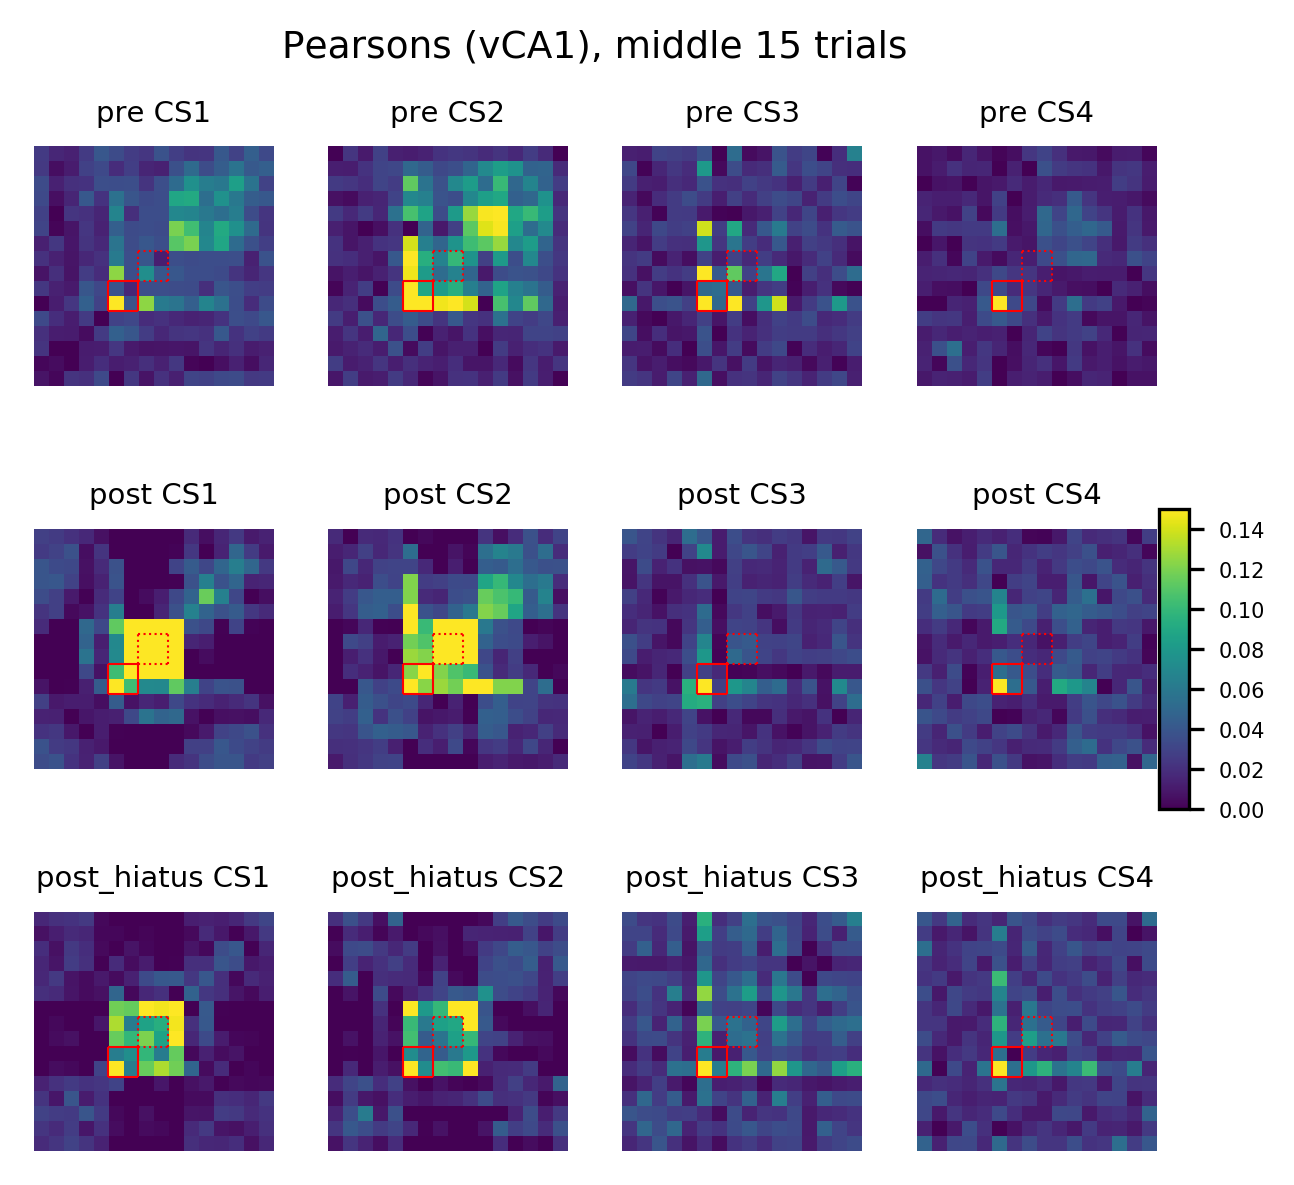

In [61]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(3,4,figsize=(4,4))
for sess,r in zip(sessions,range(len(sessions))):
    for trial,c in zip(['CS1','CS2','CS3','CS4'],[0,1,2,3]):
        im=axs[r][c].imshow(eval("mid_big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+" "+trial,fontsize=7)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1), middle 15 trials',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

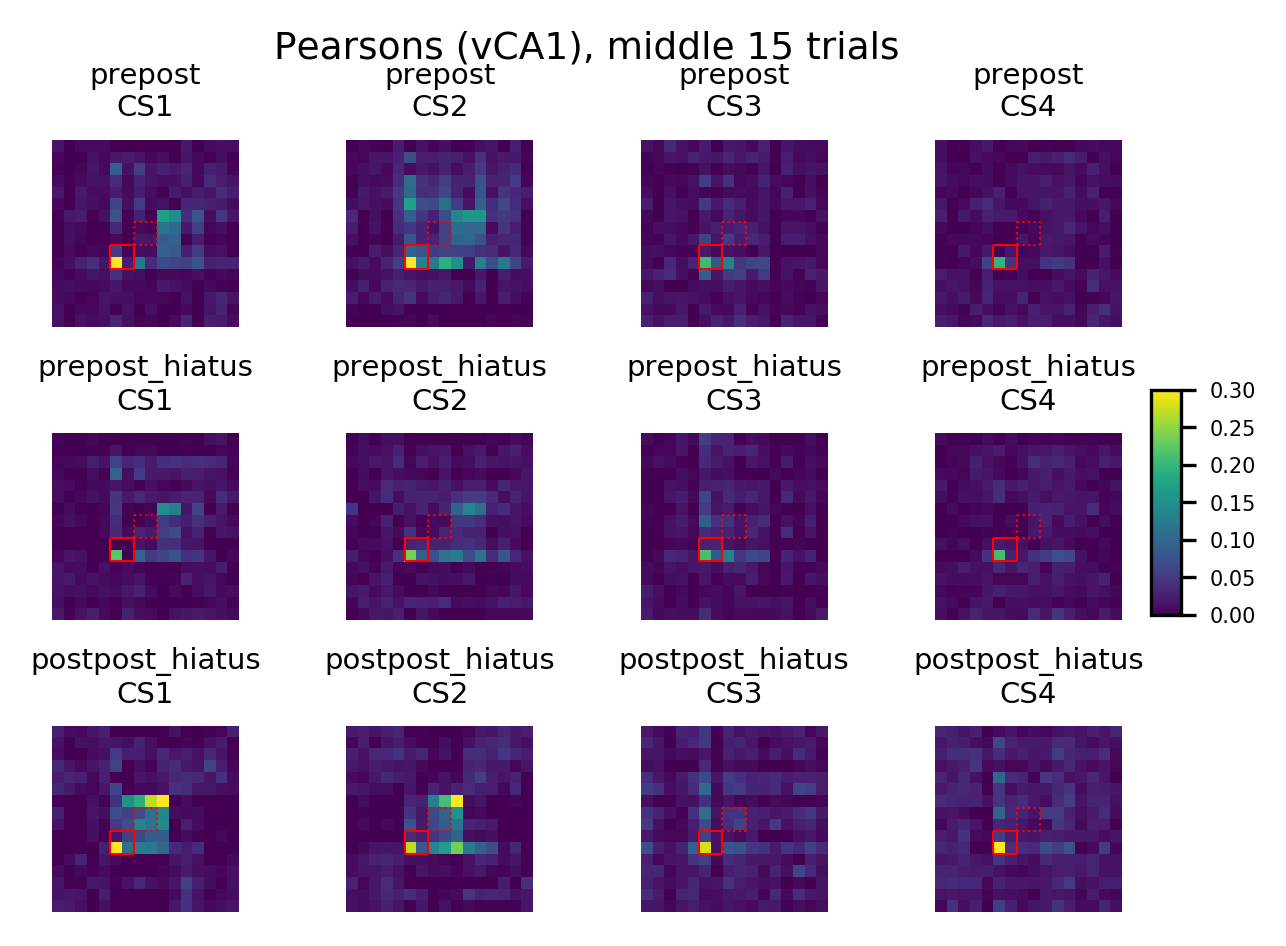

In [128]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(3,4,figsize=(4,3))
for sess,r in zip(CR_comparisons,range(len(CR_comparisons))):
    for trial,c in zip(['CS1','CS2','CS3','CS4'],[0,1,2,3]):
        im=axs[r][c].imshow(eval("mid_big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.3)
        axs[r][c].set_title(sess+"\n"+trial,fontsize=7)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1), middle 15 trials',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

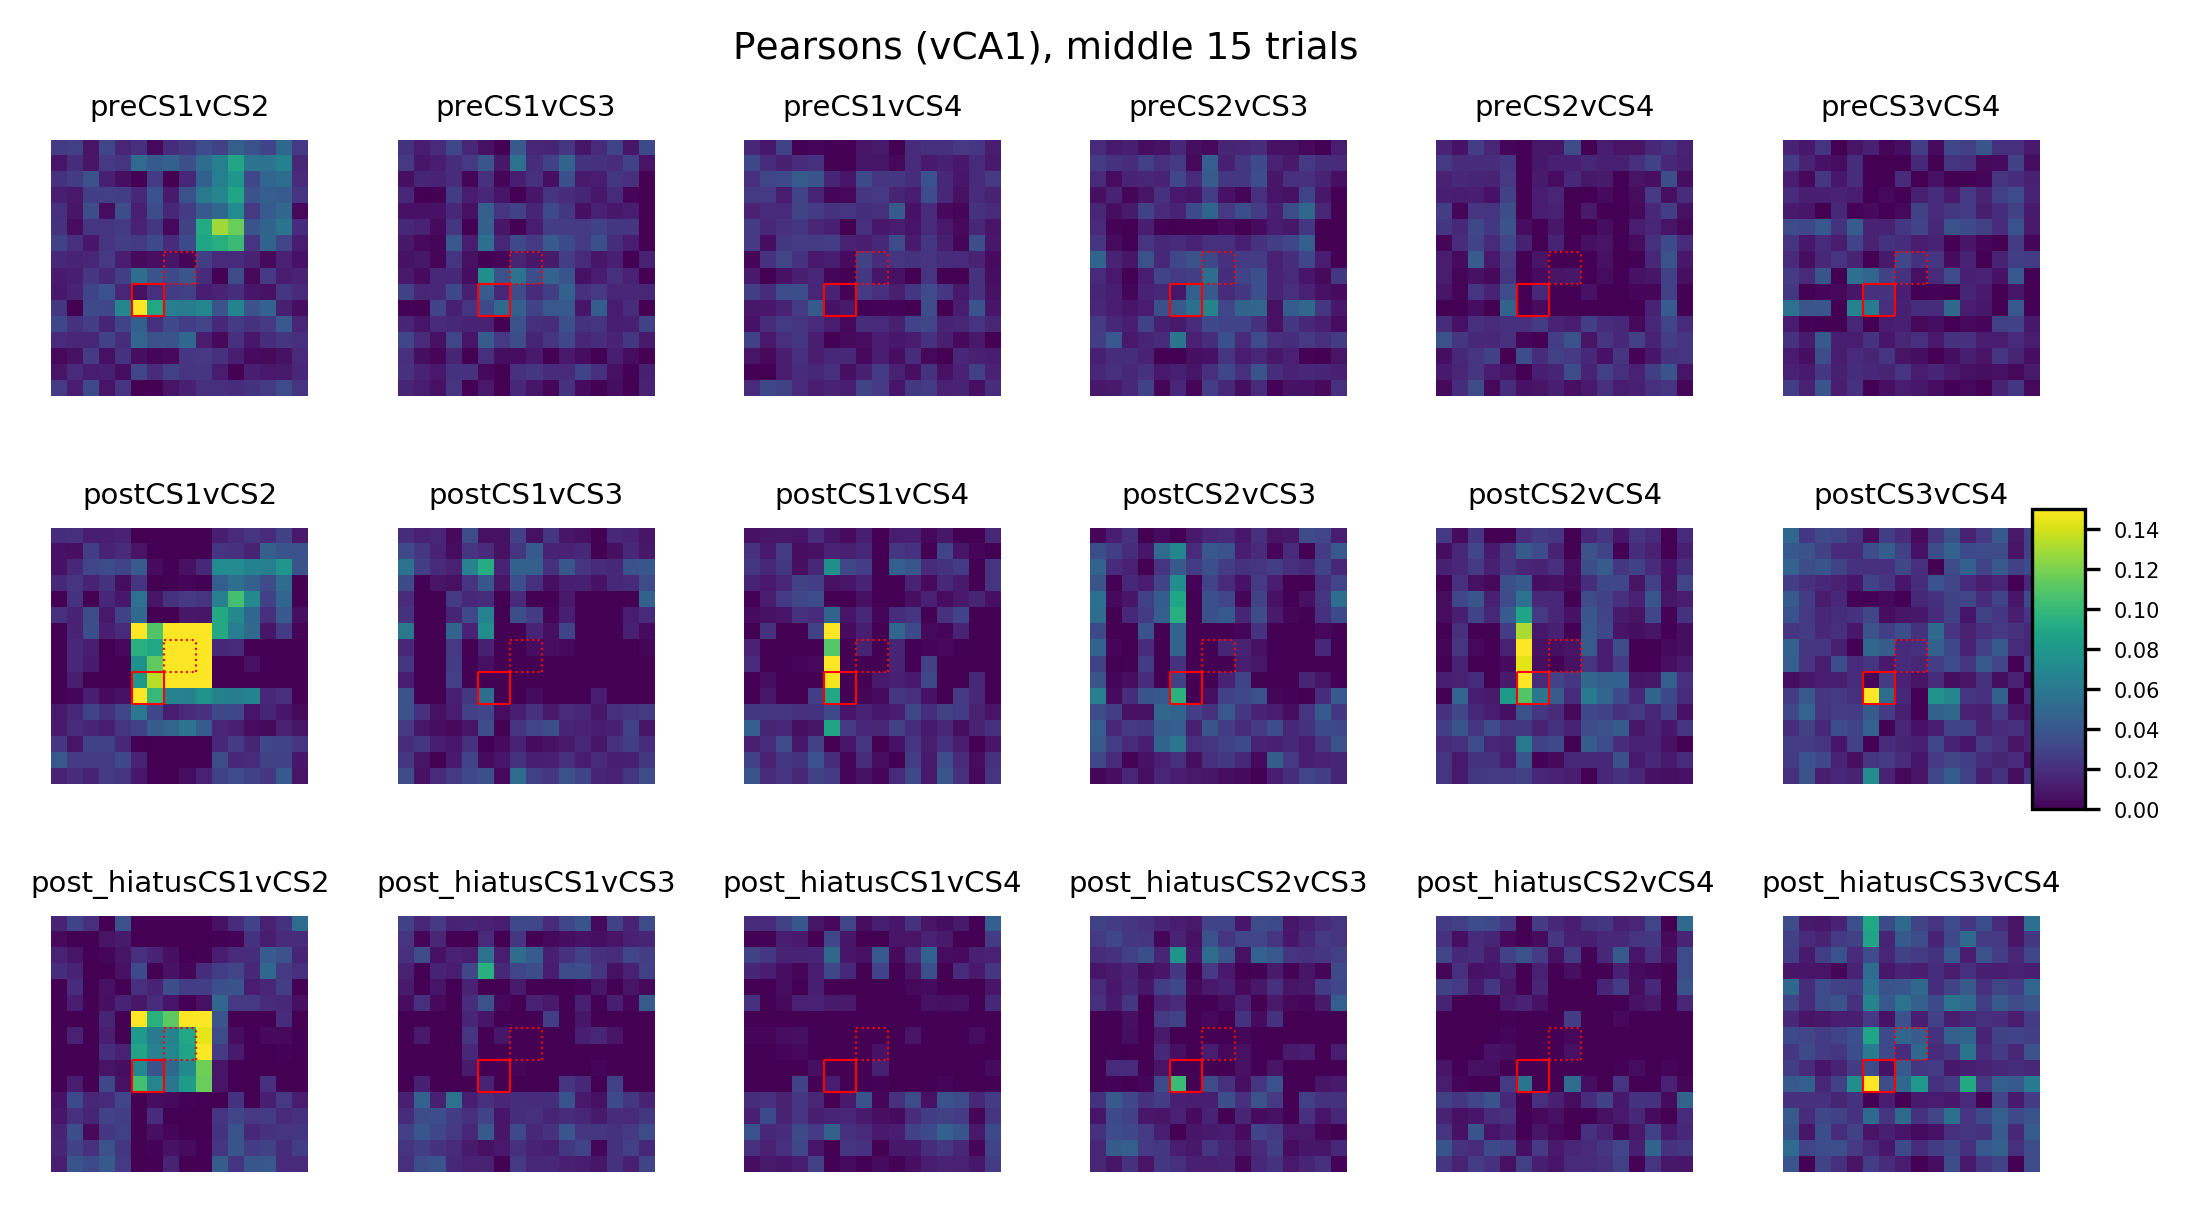

In [66]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(3,6,figsize=(7,4))
for sess,r in zip(sessions,range(len(sessions))):
    for trial,c in zip(['CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4'],[0,1,2,3,4,5]):
        im=axs[r][c].imshow(eval("mid_big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+trial,fontsize=7)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1), middle 15 trials',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

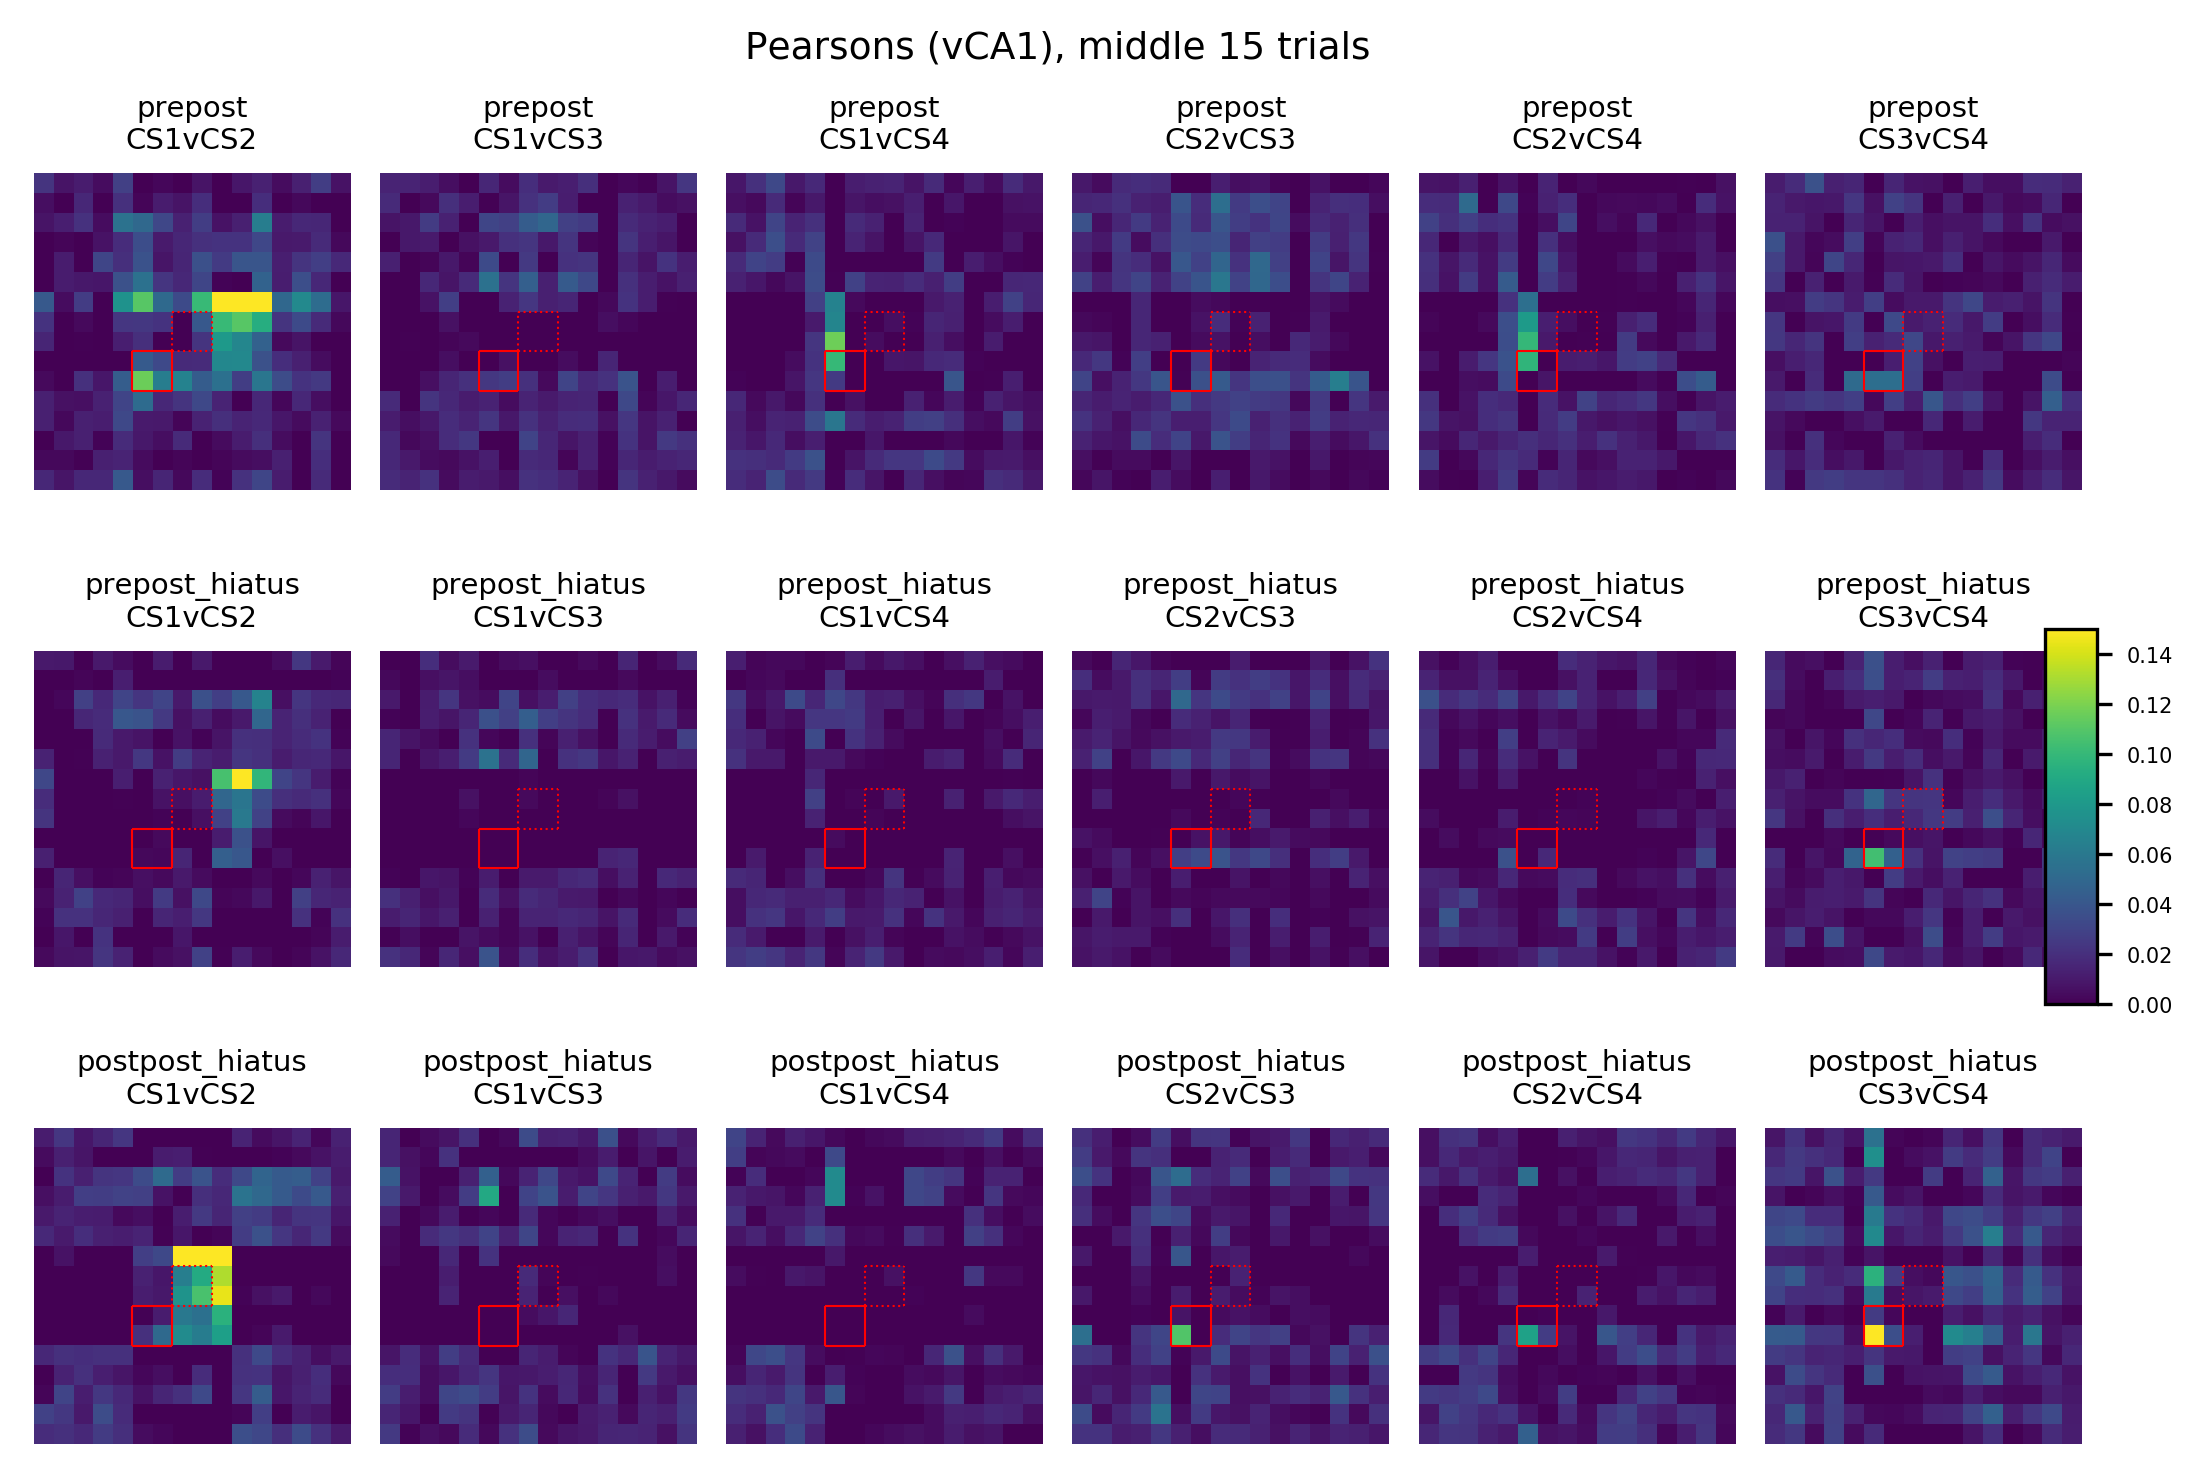

In [49]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(3,6,figsize=(7,5))
for sess,r in zip(CR_comparisons,range(len(CR_comparisons))):
    for trial,c in zip(['CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4'],[0,1,2,3,4,5]):
        im=axs[r][c].imshow(eval("mid_big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+"\n"+trial,fontsize=7)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1), middle 15 trials',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

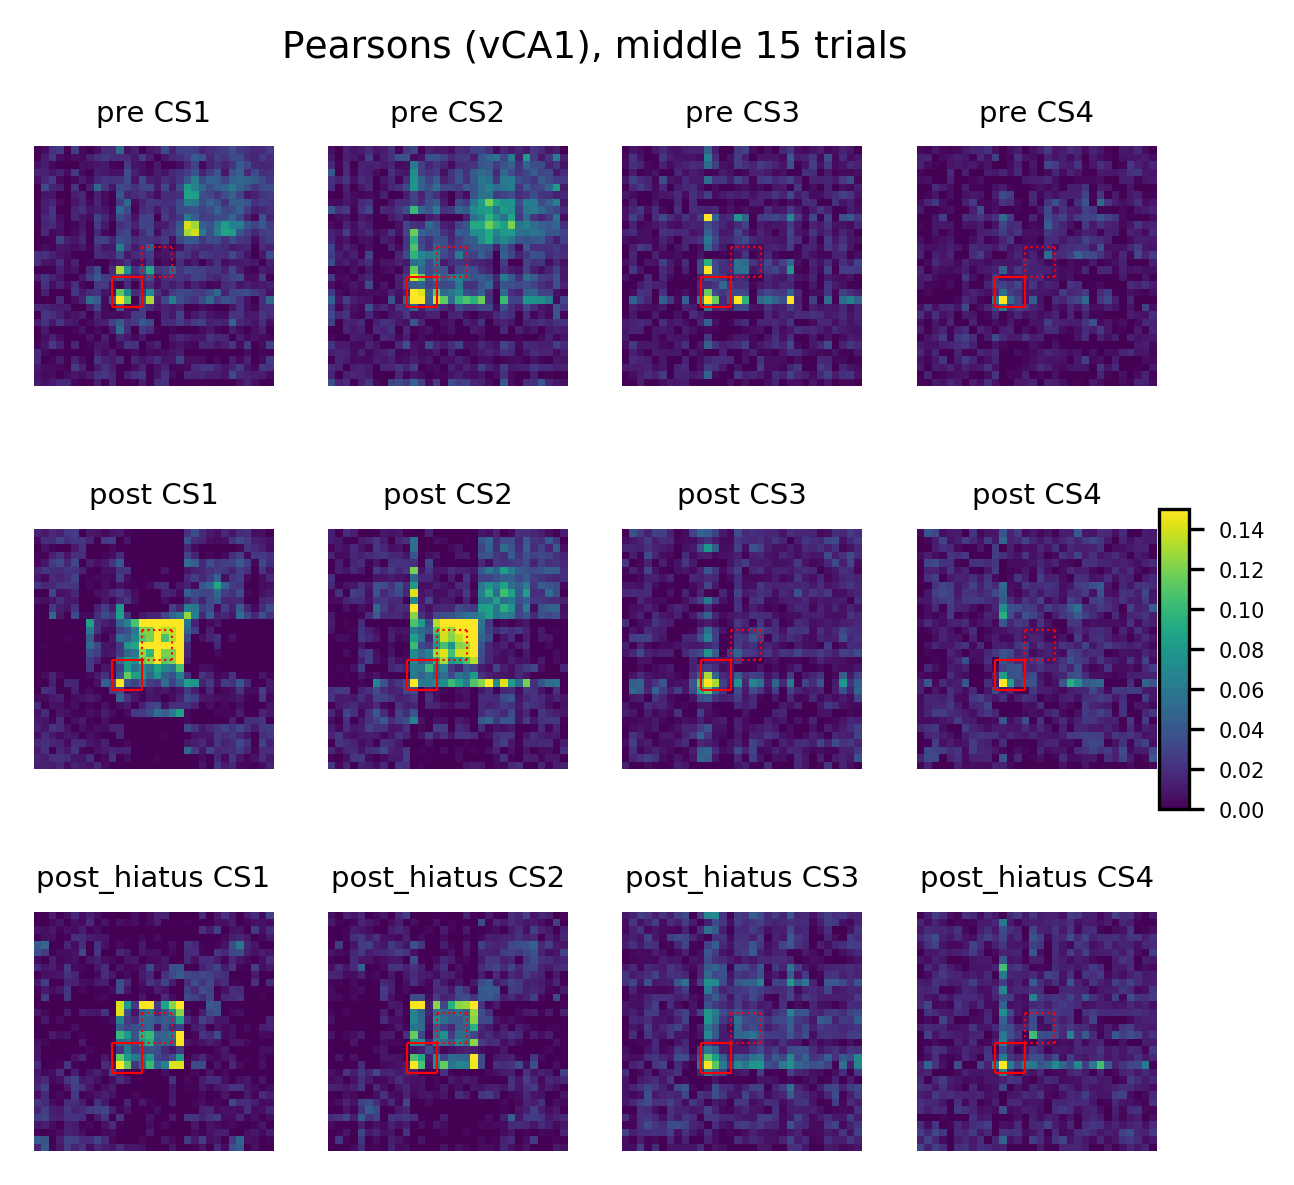

In [122]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(3,4,figsize=(4,4))
for sess,r in zip(sessions,range(len(sessions))):
    for trial,c in zip(['CS1','CS2','CS3','CS4'],[0,1,2,3]):
        im=axs[r][c].imshow(eval("mid_big_matrix_05s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+" "+trial,fontsize=7)
        axs[r][c].vlines(10,10,14,color='r')
        axs[r][c].hlines(10,10,14,color='r')
        axs[r][c].vlines(14,10,14,color='r')
        axs[r][c].hlines(14,10,14,color='r')
        axs[r][c].vlines(14,14,18,color='r',linestyle=':')
        axs[r][c].hlines(14,14,18,color='r',linestyle=':')
        axs[r][c].vlines(18,14,18,color='r',linestyle=':')
        axs[r][c].hlines(18,14,18,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1), middle 15 trials',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

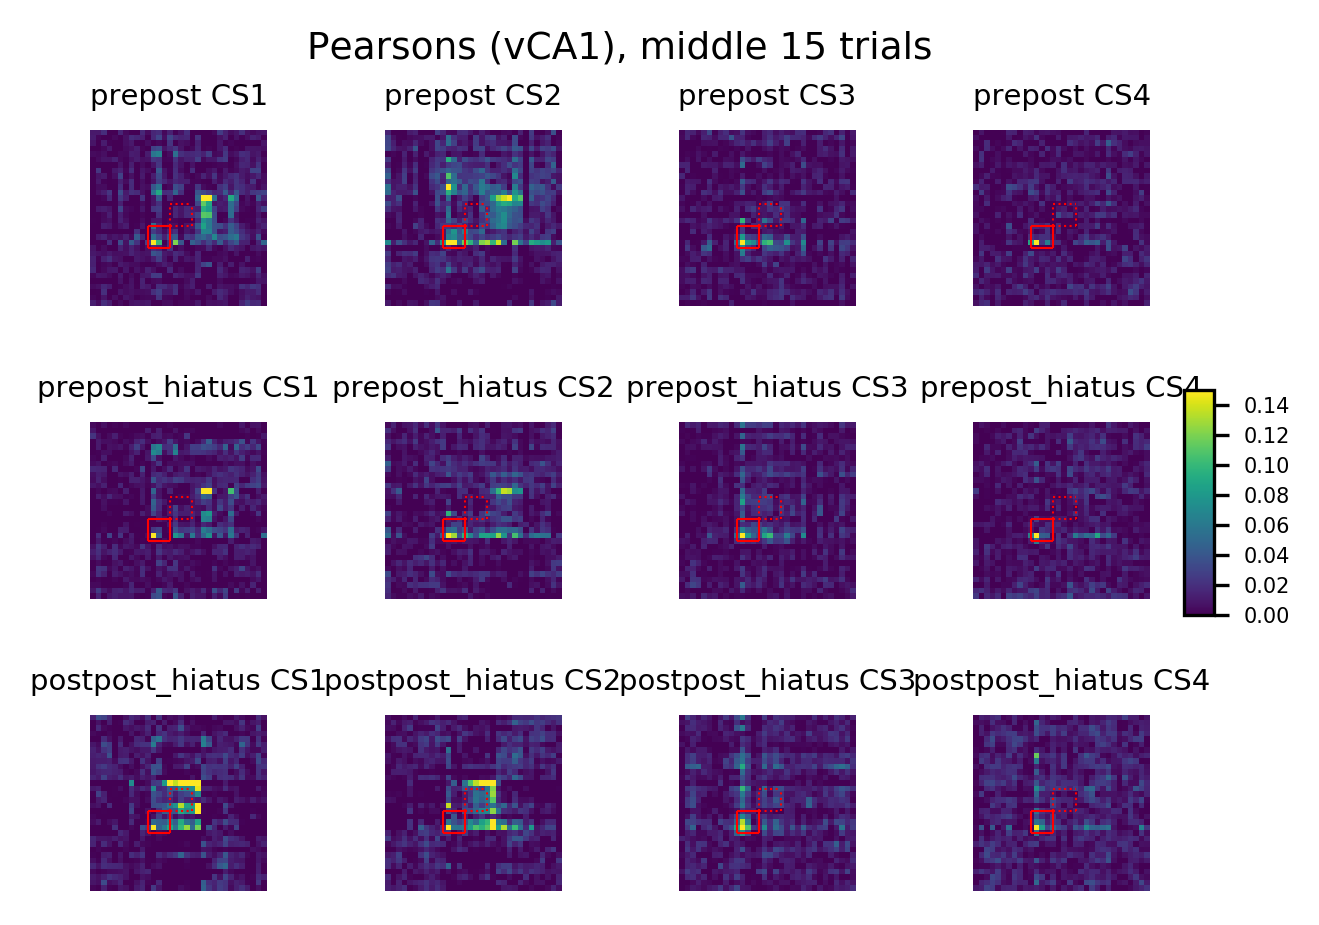

In [123]:
#importing seaborn below messes with this plot

fig,axs = pl.subplots(3,4,figsize=(4,3))
for sess,r in zip(CR_comparisons,range(len(CR_comparisons))):
    for trial,c in zip(['CS1','CS2','CS3','CS4'],[0,1,2,3]):
        im=axs[r][c].imshow(eval("mid_big_matrix_05s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+" "+trial,fontsize=7)
        axs[r][c].vlines(10,10,14,color='r')
        axs[r][c].hlines(10,10,14,color='r')
        axs[r][c].vlines(14,10,14,color='r')
        axs[r][c].hlines(14,10,14,color='r')
        axs[r][c].vlines(14,14,18,color='r',linestyle=':')
        axs[r][c].hlines(14,14,18,color='r',linestyle=':')
        axs[r][c].vlines(18,14,18,color='r',linestyle=':')
        axs[r][c].hlines(18,14,18,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1), middle 15 trials',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

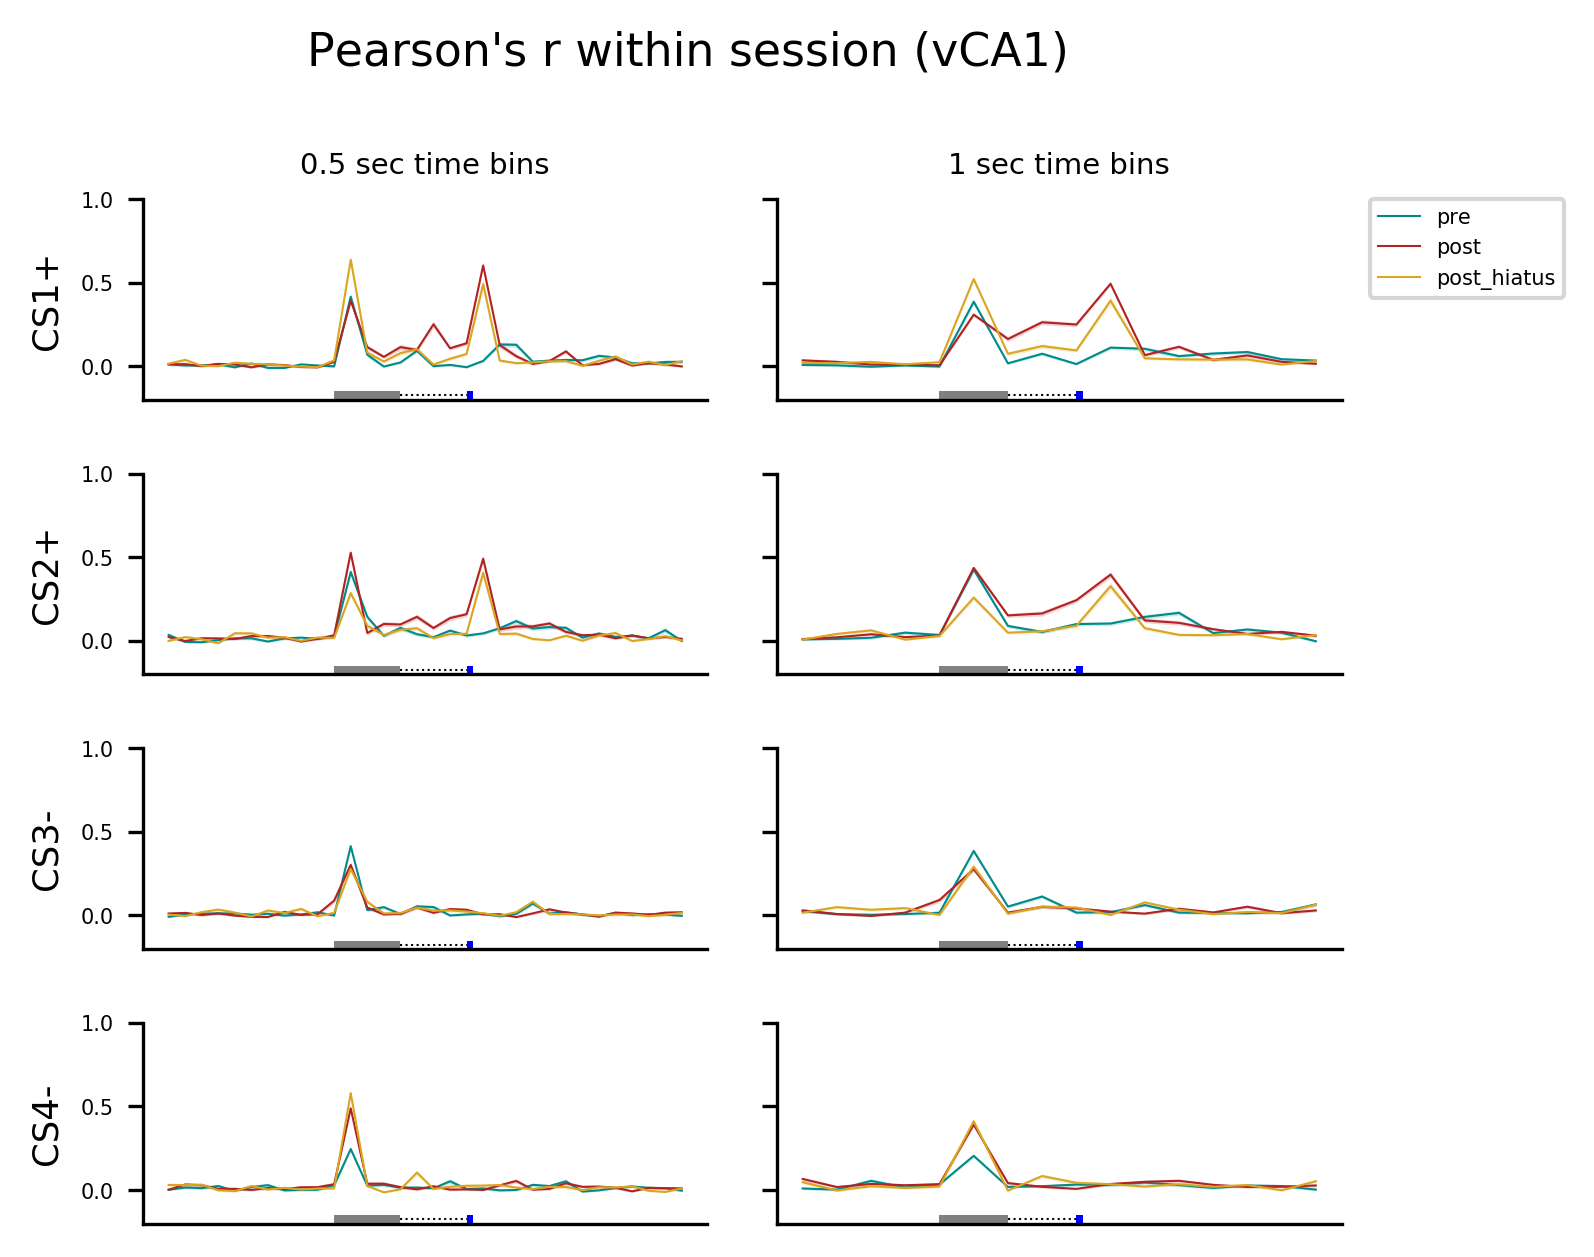

In [118]:
fig, ax = pl.subplots(4,2, figsize=(4.8, 4), sharey=True)

for x,odor in zip(range(len(odors)),odors):
    for sess,c,la in zip(sessions,['darkcyan','firebrick','goldenrod'],sessions):
        for y,tb,sub in zip(range(2),bins,[10,4]):
            ax[x][y].plot([(t-sub) for t in range(bin_ranges[y])],[eval("mid_matrix_%s_%s_%s_%s[%s]"%(tb,sess,odor,t,t)) for t in range(bin_ranges[y])],
                            color =c,ls='-',lw=.5, zorder=19 ,ms=1,label=la)
            m = np.array([eval("mid_matrix_%s_%s_%s_%s[%s]"%(tb,sess,odor,t,t)) for t in range(bin_ranges[y])])
            s = np.array([eval("mid_matrix_%s_%s_%s_%s_err[%s]"%(tb,sess,odor,t,t)) for t in range(bin_ranges[y])])
            ax[x][y].fill_between([(t-sub) for t in range(bin_ranges[y])],m-s,m+s,alpha=0.2,color=c,linewidth=0)  
for y,tick,tb in zip(range(2),[2,1],['0.5 sec','1 sec']):
    for x,odor in zip(range(len(odors)),['CS1+','CS2+','CS3-','CS4-']):
        ax[x][y].set_ylim(-0.2,1)
        #ax[x].set_xlim(-3, bin_ranges[x])
        #ax[x].set_xticks(np.arange(-2,11, 1))
        #ax[x].set_xticklabels(np.arange(-2,11, .5))
        #ax[x].set_xlabel('Time from odor onset (s)')
        ax[x][0].set_ylabel(odor,fontsize=8.5)
        pt.plot_period_bar(ax[x][y], -.2, start_end=(0, 2*tick), color='grey', delta_y=.05)
    # pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
        pt.plot_period_bar(ax[x][y], -.2, start_end=(4*tick, 4.2*tick), color='b', delta_y=.05)
        ax[x][y].hlines(-.2+.025, 2*tick, 4*tick, color='k', lw=0.5, linestyles='dotted')
        ax[x][y].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
        ax[0][y].set_title(tb+" time bins")
ax[0][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("Pearson's r within session (vCA1)", fontsize=11, y=1.05)

fig.tight_layout(pad=3)

#fig.savefig('../img/%s_3comp_horizontal.jpg'%NOTEBOOK_NAME)

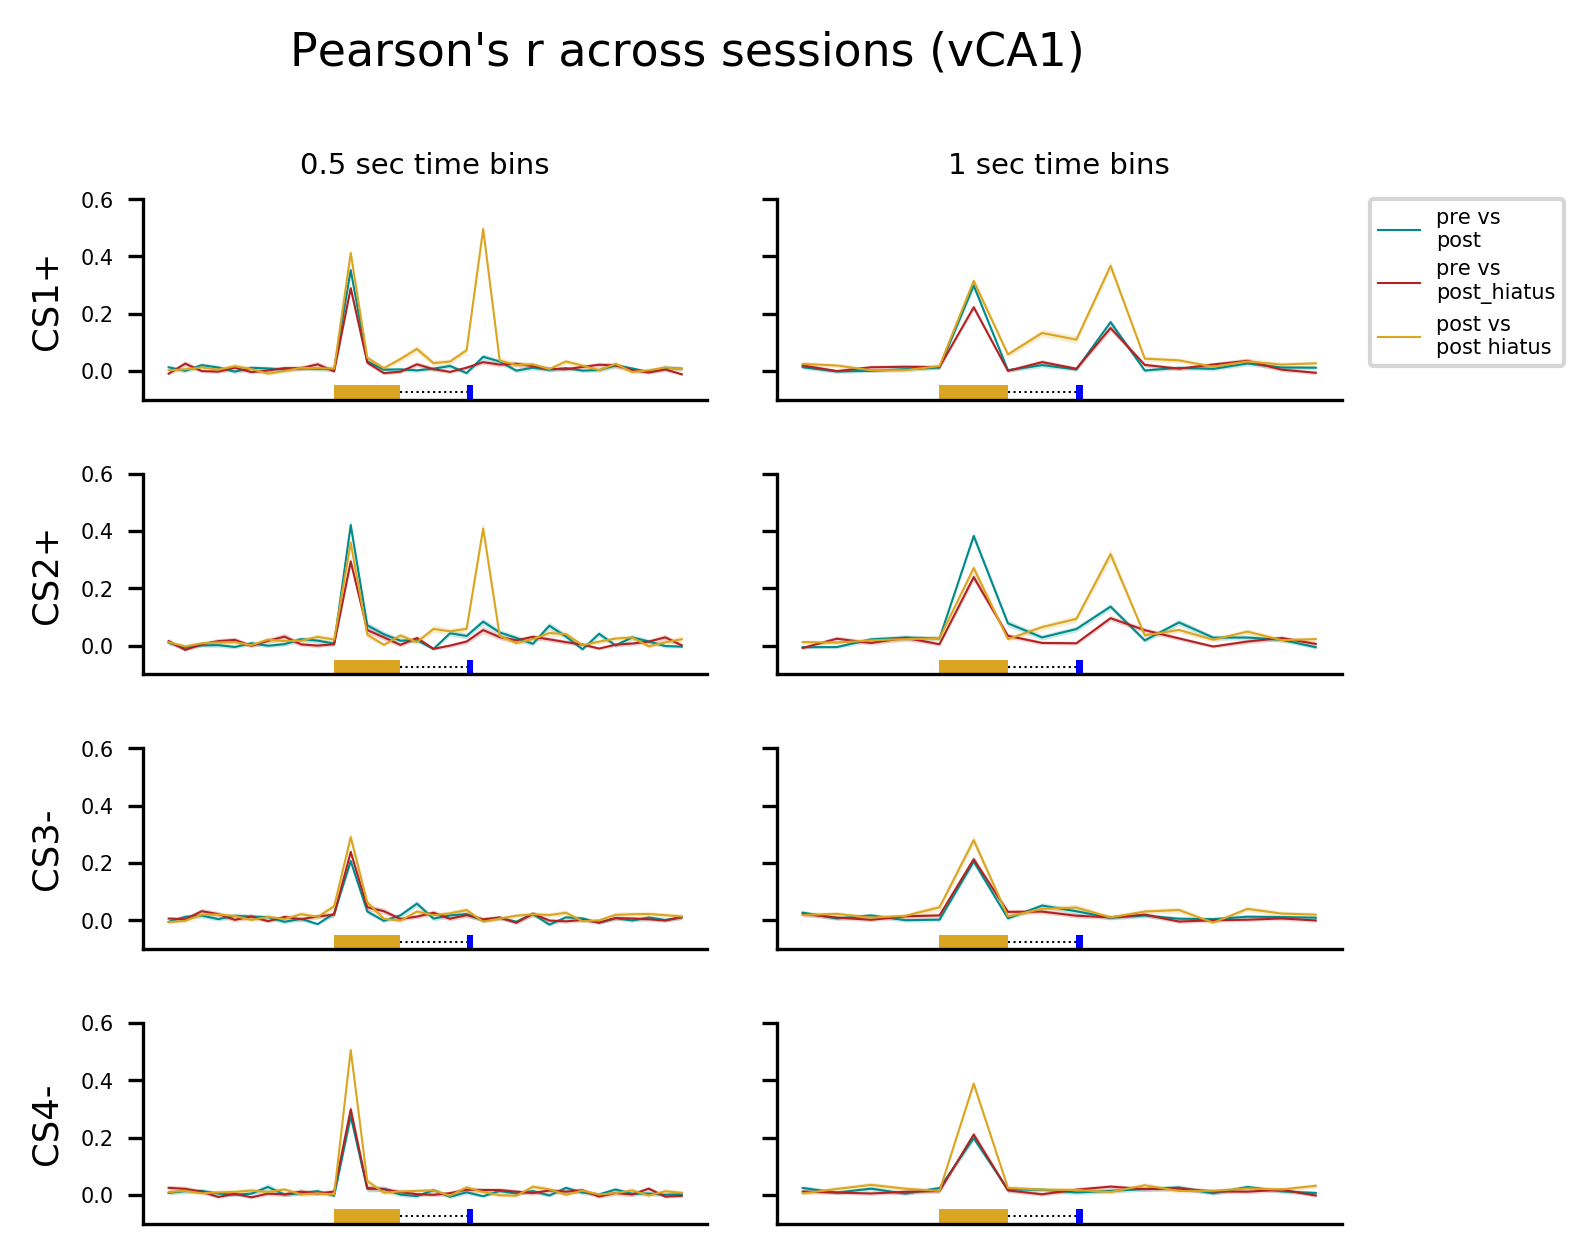

In [119]:
fig, ax = pl.subplots(4,2, figsize=(4.8, 4), sharey=True)

for x,odor in zip(range(len(odors)),odors):
    for sess,c,la in zip(CR_comparisons,['darkcyan','firebrick','goldenrod'],['pre vs\npost','pre vs\npost_hiatus','post vs\npost hiatus']):
        for y,tb,sub in zip(range(2),bins,[10,4]):
            ax[x][y].plot([(t-sub) for t in range(bin_ranges[y])],[eval("mid_matrix_%s_%s_%s_%s[%s]"%(tb,sess,odor,t,t)) for t in range(bin_ranges[y])],
                            color =c,ls='-',lw=.5, zorder=19 ,ms=1,label=la)
            m = np.array([eval("mid_matrix_%s_%s_%s_%s[%s]"%(tb,sess,odor,t,t)) for t in range(bin_ranges[y])])
            s = np.array([eval("mid_matrix_%s_%s_%s_%s_err[%s]"%(tb,sess,odor,t,t)) for t in range(bin_ranges[y])])
            ax[x][y].fill_between([(t-sub) for t in range(bin_ranges[y])],m-s,m+s,alpha=0.2,color=c,linewidth=0)  
for y,tick,tb in zip(range(2),[2,1],['0.5 sec','1 sec']):
    for x,odor in zip(range(len(odors)),['CS1+','CS2+','CS3-','CS4-']):
        ax[x][y].set_ylim(-0.1,.6)
        #ax[x].set_xlim(-3, bin_ranges[x])
        #ax[x].set_xticks(np.arange(-2,11, 1))
        #ax[x].set_xticklabels(np.arange(-2,11, .5))
        #ax[x].set_xlabel('Time from odor onset (s)')
        ax[x][0].set_ylabel(odor,fontsize=8.5)
        pt.plot_period_bar(ax[x][y], -.1, start_end=(0, 2*tick), color='goldenrod', delta_y=.05)
    # pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
        pt.plot_period_bar(ax[x][y], -.1, start_end=(4*tick, 4.2*tick), color='b', delta_y=.05)
        ax[x][y].hlines(-.1+.025, 2*tick, 4*tick, color='k', lw=0.5, linestyles='dotted')
        ax[x][y].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
        ax[0][y].set_title(tb+" time bins")
ax[0][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("Pearson's r across sessions (vCA1)", fontsize=11, y=1.05)

fig.tight_layout(pad=3)

#fig.savefig('../img/%s_3comp_horizontal.jpg'%NOTEBOOK_NAME)

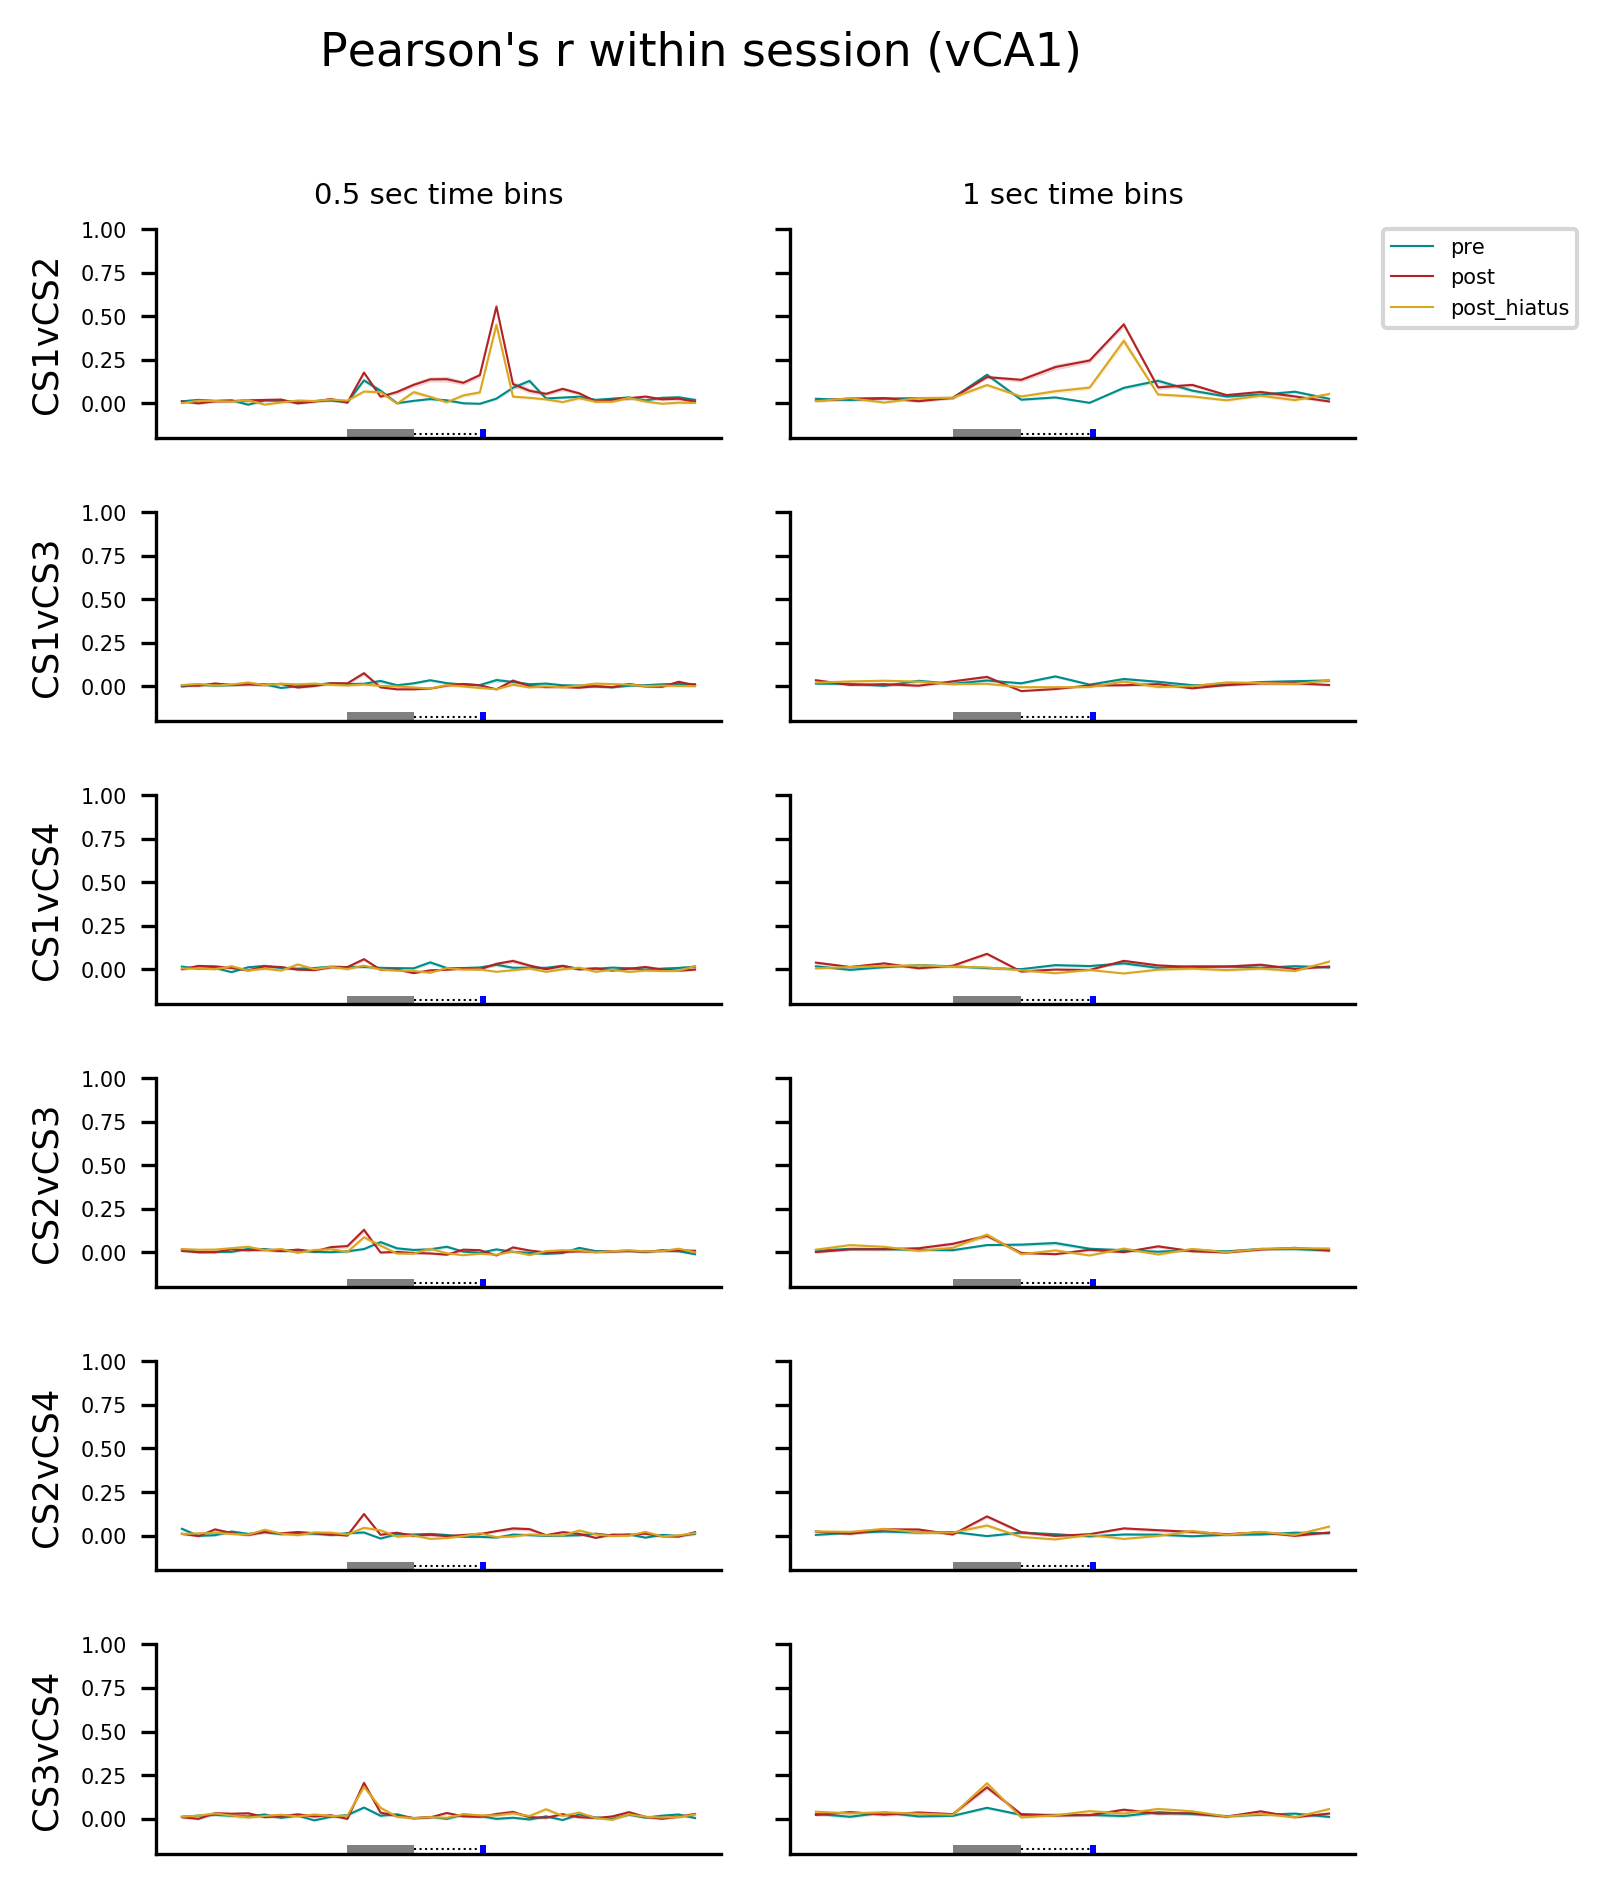

In [125]:
fig, ax = pl.subplots(6,2, figsize=(4.8, 6), sharey=True)

for x,odor in zip(range(6),['CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4']):
    for sess,c,la in zip(sessions,['darkcyan','firebrick','goldenrod'],sessions):
        for y,tb,sub in zip(range(2),bins,[10,4]):
            ax[x][y].plot([(t-sub) for t in range(bin_ranges[y])],[eval("mid_matrix_%s_%s_%s_%s[%s]"%(tb,sess,odor,t,t)) for t in range(bin_ranges[y])],
                            color =c,ls='-',lw=.5, zorder=19 ,ms=1,label=la)
            m = np.array([eval("mid_matrix_%s_%s_%s_%s[%s]"%(tb,sess,odor,t,t)) for t in range(bin_ranges[y])])
            s = np.array([eval("mid_matrix_%s_%s_%s_%s_err[%s]"%(tb,sess,odor,t,t)) for t in range(bin_ranges[y])])
            ax[x][y].fill_between([(t-sub) for t in range(bin_ranges[y])],m-s,m+s,alpha=0.2,color=c,linewidth=0)  
for y,tick,tb in zip(range(2),[2,1],['0.5 sec','1 sec']):
    for x,odor in zip(range(6),['CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4']):
        ax[x][y].set_ylim(-0.2,1)
        #ax[x].set_xlim(-3, bin_ranges[x])
        #ax[x].set_xticks(np.arange(-2,11, 1))
        #ax[x].set_xticklabels(np.arange(-2,11, .5))
        #ax[x].set_xlabel('Time from odor onset (s)')
        ax[x][0].set_ylabel(odor,fontsize=8.5)
        pt.plot_period_bar(ax[x][y], -.2, start_end=(0, 2*tick), color='grey', delta_y=.05)
    # pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
        pt.plot_period_bar(ax[x][y], -.2, start_end=(4*tick, 4.2*tick), color='b', delta_y=.05)
        ax[x][y].hlines(-.2+.025, 2*tick, 4*tick, color='k', lw=0.5, linestyles='dotted')
        ax[x][y].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
        ax[0][y].set_title(tb+" time bins")
ax[0][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("Pearson's r within session (vCA1)", fontsize=11, y=1.05)

fig.tight_layout(pad=3)

#fig.savefig('../img/%s_3comp_horizontal.jpg'%NOTEBOOK_NAME)

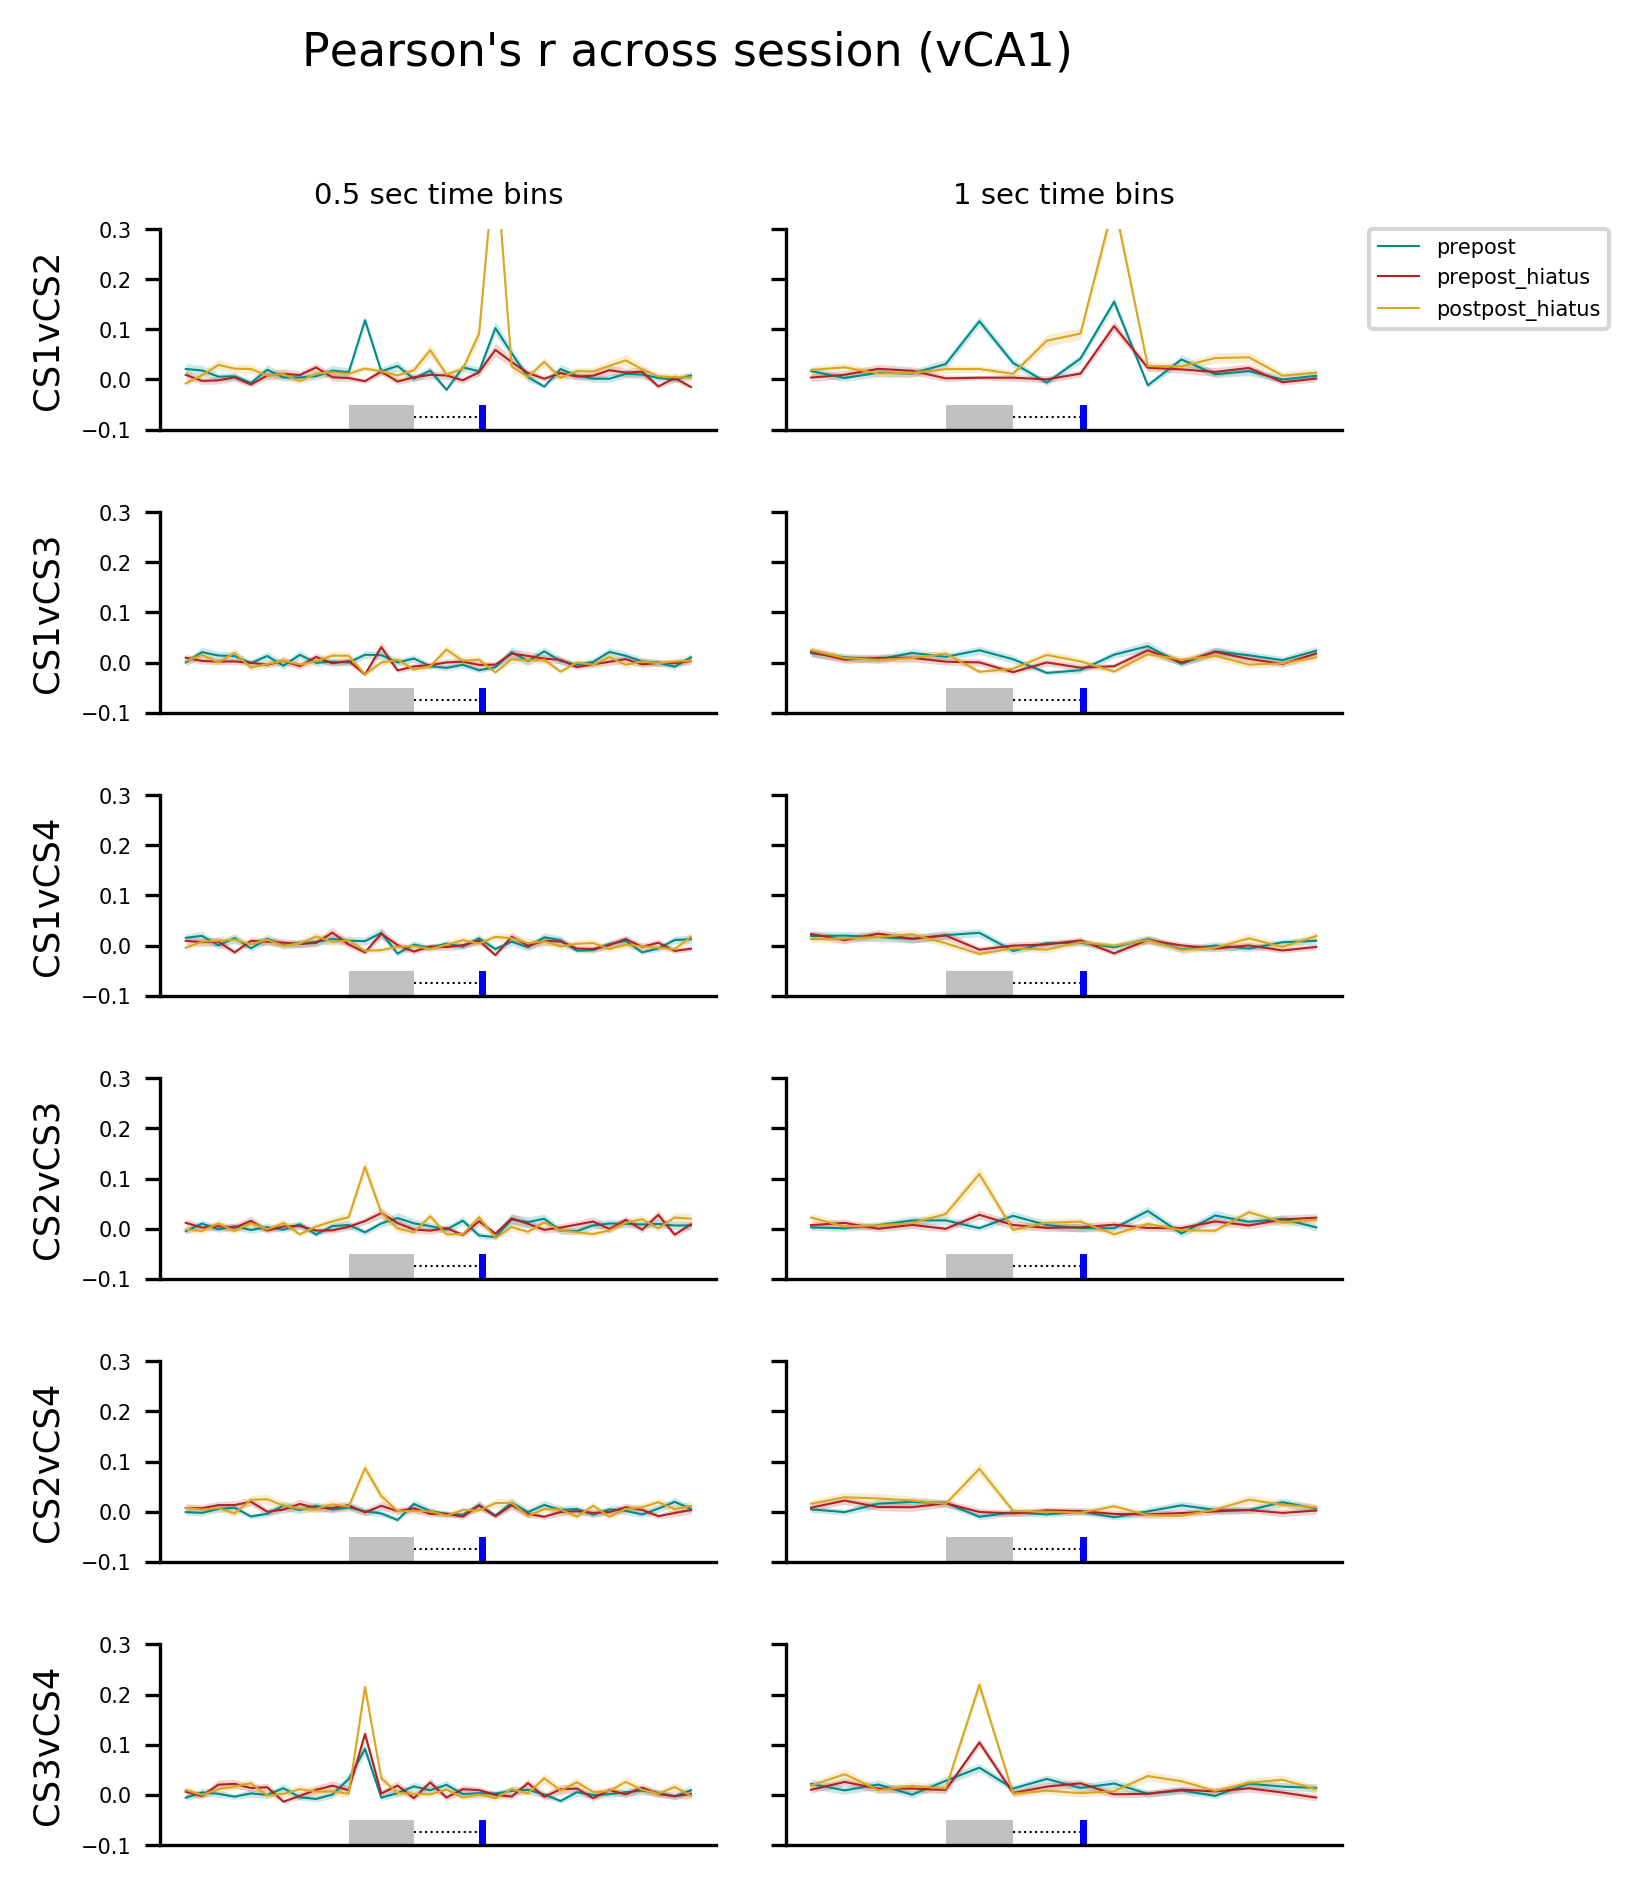

In [129]:
fig, ax = pl.subplots(6,2, figsize=(4.8, 6), sharey=True)

for x,odor in zip(range(6),['CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4']):
    for sess,c,la in zip(CR_comparisons,['darkcyan','firebrick','goldenrod'],CR_comparisons):
        for y,tb,sub in zip(range(2),bins,[10,4]):
            ax[x][y].plot([(t-sub) for t in range(bin_ranges[y])],[eval("mid_matrix_%s_%s_%s_%s[%s]"%(tb,sess,odor,t,t)) for t in range(bin_ranges[y])],
                            color =c,ls='-',lw=.5, zorder=19 ,ms=1,label=la)
            m = np.array([eval("mid_matrix_%s_%s_%s_%s[%s]"%(tb,sess,odor,t,t)) for t in range(bin_ranges[y])])
            s = np.array([eval("mid_matrix_%s_%s_%s_%s_err[%s]"%(tb,sess,odor,t,t)) for t in range(bin_ranges[y])])
            ax[x][y].fill_between([(t-sub) for t in range(bin_ranges[y])],m-s,m+s,alpha=0.2,color=c,linewidth=0)  
for y,tick,tb in zip(range(2),[2,1],['0.5 sec','1 sec']):
    for x,odor in zip(range(6),['CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4']):
        ax[x][y].set_ylim(-0.1,.3)
        #ax[x].set_xlim(-3, bin_ranges[x])
        #ax[x].set_xticks(np.arange(-2,11, 1))
        #ax[x].set_xticklabels(np.arange(-2,11, .5))
        #ax[x].set_xlabel('Time from odor onset (s)')
        ax[x][0].set_ylabel(odor,fontsize=8.5)
        pt.plot_period_bar(ax[x][y], -.1, start_end=(0, 2*tick), color='silver', delta_y=.05)
    # pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
        pt.plot_period_bar(ax[x][y], -.1, start_end=(4*tick, 4.2*tick), color='b', delta_y=.05)
        ax[x][y].hlines(-.1+.025, 2*tick, 4*tick, color='k', lw=0.5, linestyles='dotted')
        ax[x][y].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
        ax[0][y].set_title(tb+" time bins")
ax[0][1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
pl.suptitle("Pearson's r across session (vCA1)", fontsize=11, y=1.05)

fig.tight_layout(pad=3)

#fig.savefig('../img/%s_3comp_horizontal.jpg'%NOTEBOOK_NAME)

dark_co = ('darkcyan','firebrick','goldenrod')

for sess, i in zip(CR_comparisons,range(len(CR_comparisons))):
    pl.bar(i,eval("mid_matrix_1s_%s_CS1_5[5]"%sess),color = dark_co[i],width=.9,yerr=eval("mid_matrix_1s_%s_CS1_5_err[5]"%sess))
pl.xticks([0,1,2],['pre\nvs\npost','pre\nvs\npost_hiatus','post\nvs\npost hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("mid 15 trials:\nCS1 pairwise correlations 0-1s post odor onset (vCA1)")
pl.ylim(0,.6)

dark_co = ('darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions,range(len(sessions))):
    pl.bar(i,eval("mid_matrix_1s_%s_CS2_5[5]"%sess),color = dark_co[i],width=.9,yerr=eval("mid_matrix_1s_%s_CS2_5_err[5]"%sess))
pl.xticks([0,1,2],['pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("mid 15 trials:\nCS2 pairwise correlations 0-1s post odor onset (vCA1)")
pl.ylim(0,.6)

dark_co = ('darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions,range(len(sessions))):
    pl.bar(i,eval("mid_matrix_1s_%s_CS3_5[5]"%sess),color = dark_co[i],width=.9,yerr=eval("mid_matrix_1s_%s_CS3_5_err[5]"%sess))
pl.xticks([0,1,2],['pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("mid 15 trials:\nCS3 pairwise correlations 0-1s post odor onset (vCA1)")
pl.ylim(0,.6)

dark_co = ('darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions,range(len(sessions))):
    pl.bar(i,eval("mid_matrix_1s_%s_CS4_5[5]"%sess),color = dark_co[i],width=.9,yerr=eval("mid_matrix_1s_%s_CS4_5_err[5]"%sess))
pl.xticks([0,1,2],['pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("mid 15 trials:\nCS4 pairwise correlations 0-1s post odor onset (vCA1)")
pl.ylim(0,.6)

dark_co = ('darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions,range(len(sessions))):
    pl.bar(i,eval("mid_matrix_1s_%s_CS2_8[8]"%sess),color = dark_co[i],width=.9,yerr=eval("mid_matrix_1s_%s_CS2_8_err[8]"%sess))
pl.xticks([0,1,2],['pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("mid 15 trials:\nCS1 pairwise correlations 3-4s post odor onset (vCA1)")
pl.ylim(0,.6)

dark_co = ('darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions,range(len(sessions))):
    pl.bar(i,eval("mid_matrix_1s_%s_CS1_9[9]"%sess),color = dark_co[i],width=.9,yerr=eval("mid_matrix_1s_%s_CS1_9_err[9]"%sess))
pl.xticks([0,1,2],['pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("mid 15 trials:\nCS1 pairwise correlations 0-1s post REW deliver (vCA1)")
pl.ylim(0,.6)

dark_co = ('darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions,range(len(sessions))):
    pl.bar(i,eval("matrix_1s_%s_CS1_5[5]"%sess),color = dark_co[i],width=.9,yerr=eval("matrix_1s_%s_CS1_5_err[5]"%sess))
pl.xticks([0,1,2],['pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("All trials:\nCS1 pairwise correlations 0-1s post odor onset (vCA1)")
pl.ylim(0,.6)

dark_co = ('darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions,range(len(sessions))):
    pl.bar(i,eval("matrix_1s_%s_CS2_5[5]"%sess),color = dark_co[i],width=.9,yerr=eval("matrix_1s_%s_CS2_5_err[5]"%sess))
pl.xticks([0,1,2],['pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("All trials:\nCS2 pairwise correlations 0-1s post odor onset (vCA1)")
pl.ylim(0,.6)

dark_co = ('forestgreen','darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions,range(len(sessions))):
    pl.bar(i,eval("matrix_1s_%s_CS3_5[5]"%sess),color = dark_co[i],width=.9,yerr=eval("matrix_1s_%s_CS3_5_err[5]"%sess))
pl.xticks([0,1,2,3],['expo','pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("All trials:\nCS3 pairwise correlations 0-1s post odor onset (vCA1)")
pl.ylim(0,.6)

dark_co = ('forestgreen','darkcyan','firebrick','goldenrod')

for sess, i in zip(sessions,range(len(sessions))):
    pl.bar(i,eval("matrix_1s_%s_CS4_5[5]"%sess),color = dark_co[i],width=.9,yerr=eval("matrix_1s_%s_CS4_5_err[5]"%sess))
pl.xticks([0,1,2,3],['expo','pre','post','post hiatus'])
pl.ylabel("Pearson's r (SEM)")
pl.title("All trials:\nCS4 pairwise correlations 0-1s post odor onset (vCA1)")
pl.ylim(0,.6)

sess='pre'
for odor,c in zip(odors,['b','cornflowerblue','gray','k']):
        pl.errorbar([r for r in range(16)],[eval("mid_matrix_1s_%s_%s_%s[r]"%(sess,odor,r)) for r in range(16)],
                    yerr=[eval("mid_matrix_1s_%s_%s_%s_err[r]"%(sess,odor,r)) for r in range(16)],color=c,label=odor)
pl.xticks(np.arange(0,16,2),np.arange(-4,10,2)) 
pl.ylim(0,.7)
pl.legend()
pl.xlabel('time from odor onset')
        #pl.ylim(-.01,.25)
pl.title("%s, middle 15 trials (vCA1)"%sess)

sess='post'
for odor,c in zip(odors,['b','cornflowerblue','gray','k']):
        pl.errorbar([r for r in range(16)],[eval("mid_matrix_1s_%s_%s_%s[r]"%(sess,odor,r)) for r in range(16)],
                    yerr=[eval("mid_matrix_1s_%s_%s_%s_err[r]"%(sess,odor,r)) for r in range(16)],color=c,label=odor)
pl.xticks(np.arange(0,16,2),np.arange(-4,10,2))        
pl.legend()
pl.ylim(0,.7)
pl.xlabel('time from odor onset')
        #pl.ylim(-.01,.25)
pl.title("%s, middle 15 trials (vCA1)"%sess)

sess='post_hiatus'
for odor,c in zip(odors,['b','cornflowerblue','gray','k']):
        pl.errorbar([r for r in range(16)],[eval("mid_matrix_1s_%s_%s_%s[r]"%(sess,odor,r)) for r in range(16)],
                    yerr=[eval("mid_matrix_1s_%s_%s_%s_err[r]"%(sess,odor,r)) for r in range(16)],color=c,label=odor)
pl.xticks(np.arange(0,16,2),np.arange(-4,10,2))        
pl.legend()
pl.ylim(0,.7)
pl.xlabel('time from odor onset')
        #pl.ylim(-.01,.25)
pl.title("%s, middle 15 trials (vCA1)"%sess)

odor='CS1'
for sess,c in zip(sessions,['darkcyan','firebrick','goldenrod']):
        pl.errorbar([r for r in range(16)],[eval("mid_matrix_1s_%s_%s_%s[r]"%(sess,odor,r)) for r in range(16)],
                    yerr=[eval("mid_matrix_1s_%s_%s_%s_err[r]"%(sess,odor,r)) for r in range(16)],color=c,label=sess)
pl.xticks(np.arange(0,16,2),np.arange(-4,10,2))        
pl.legend()
pl.ylim(0,.7)
pl.xlabel('time from odor onset')
        #pl.ylim(-.01,.25)
pl.title("%s, middle 15 trials (vCA1)"%odor)

odor='CS2'
for sess,c in zip(sessions,['darkcyan','firebrick','goldenrod']):
        pl.errorbar([r for r in range(16)],[eval("mid_matrix_1s_%s_%s_%s[r]"%(sess,odor,r)) for r in range(16)],
                    yerr=[eval("mid_matrix_1s_%s_%s_%s_err[r]"%(sess,odor,r)) for r in range(16)],color=c,label=sess)
pl.xticks(np.arange(0,16,2),np.arange(-4,10,2))        
pl.legend()
pl.ylim(0,.7)
pl.xlabel('time from odor onset')
        #pl.ylim(-.01,.25)
pl.title("%s, middle 15 trials (vCA1)"%odor)

odor='CS3'
for sess,c in zip(sessions,['darkcyan','firebrick','goldenrod']):
        pl.errorbar([r for r in range(16)],[eval("mid_matrix_1s_%s_%s_%s[r]"%(sess,odor,r)) for r in range(16)],
                    yerr=[eval("mid_matrix_1s_%s_%s_%s_err[r]"%(sess,odor,r)) for r in range(16)],color=c,label=sess)
pl.xticks(np.arange(0,16,2),np.arange(-4,10,2))        
pl.legend()
pl.ylim(0,.7)
pl.xlabel('time from odor onset')
        #pl.ylim(-.01,.25)
pl.title("%s, middle 15 trials (vCA1)"%odor)

odor='CS4'
for sess,c in zip(sessions,['darkcyan','firebrick','goldenrod']):
        pl.errorbar([r for r in range(16)],[eval("mid_matrix_1s_%s_%s_%s[r]"%(sess,odor,r)) for r in range(16)],
                    yerr=[eval("mid_matrix_1s_%s_%s_%s_err[r]"%(sess,odor,r)) for r in range(16)],color=c,label=sess)
pl.xticks(np.arange(0,16,2),np.arange(-4,10,2))        
pl.legend()
pl.ylim(0,.7)
pl.xlabel('time from odor onset')
        #pl.ylim(-.01,.25)
pl.title("%s, middle 15 trials (vCA1)"%odor)

In [120]:
save_workspace(db)

Could not store variable 'math'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'os'. Skipping...


### now look at similarity at beginning and end of session

def compute_similarity_matrix_across (pattern_ids, all_patterns1, all_patterns2):
    
    corrmat_distr = {}
    for i, (l, a) in enumerate(zip(pattern_ids, all_patterns1)):
        for j, (m, b) in enumerate(zip(pattern_ids, all_patterns2)):
            temp = []
            for ii, aa in enumerate(a):
                for jj, bb in enumerate(b):
                    # skip if either of the 2 vecotrs is zero
                    if np.sum(aa)==0 or np.sum(bb)==0: continue
                    # count once if using same data
                    if l==m and jj<ii: continue
                    temp.append(sstats.pearsonr(aa, bb)[0])
            corrmat_distr[(l, m)] = temp
    corrmat = np.zeros((len(pattern_ids), len(pattern_ids)))
    for i, p in enumerate(pattern_ids):
        for j, q in enumerate(pattern_ids):
            corrmat[i][j] = np.mean(corrmat_distr[(p, q)])

    return corrmat_distr, corrmat

%%time
#extract the first or last 10 trials of each trial type and make a new variable. For first trials, take beginning with trial 5)
for tb in bins:
    for sess in sessions[1:]:  #exclude expo
        exec("first_patterns_%s_%s=[]"%(tb,sess))
        for x in range(len(eval("all_patterns_%s_%s"%(tb,sess)))):
            exec("first_patterns_%s_%s.append(all_patterns_%s_%s[x][5:15])"%(tb,sess,tb,sess))
            
        exec("last_patterns_%s_%s=[]"%(tb,sess))
        for x in range(len(eval("all_patterns_%s_%s"%(tb,sess)))):
            exec("last_patterns_%s_%s.append(all_patterns_%s_%s[x][-10:])"%(tb,sess,tb,sess))
        
        #exec("first_last_patterns_%s = np.append(first_patterns_%s, last_patterns_%s,axis=0)"%(sess,sess,sess))
        corrmat_distr, corrmat = compute_similarity_matrix_across(eval("pattern_ids_%s_%s"%(tb,sess)),
                                 eval("first_patterns_%s_%s"%(tb,sess)),eval("last_patterns_%s_%s"%(tb,sess)))
        exec("separated_first_last_res_%s_%s=corrmat_distr"%(tb,sess))
        print '%s DONE!'%sess,

#make matrix of all comparisons across tbs
for tb,i in zip(bins,range(len(bins))):
    for tb1 in range(bin_ranges[i]):
        for sess in sessions[1:]:
            for odor in odors:
                exec("FL_matrix_%s_%s_%s_%s = []"%(tb,sess,odor,tb1))
                exec("FL_matrix_%s_%s_%s_%s_all = []"%(tb,sess,odor,tb1))
                for tb2 in range(bin_ranges[i]):
                    #get mean values across all animals
                    eval("FL_matrix_%s_%s_%s_%s"%(tb,sess,odor,tb1)).insert(tb2,eval("np.mean(separated_first_last_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s'])\
                        "%(tb,sess,tb,tb1,odor,sess,tb,tb2,odor,sess)))
                    eval("FL_matrix_%s_%s_%s_%s_all"%(tb,sess,odor,tb1)).insert(tb2,eval("separated_first_last_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s']\
                        "%(tb,sess,tb,tb1,odor,sess,tb,tb2,odor,sess)))

#make matrix of all CSP vs CSm comparisons across tbs
for tb,i in zip(bins,range(len(bins))):
    for odor_comp in 'CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4':
        for tb1 in range(bin_ranges[i]):
            for sess in sessions[1:]:
                exec("FL_matrix_%s_%s_%s_%s = []"%(tb,sess,odor_comp,tb1))
                exec("FL_matrix_%s_%s_%s_%s_all = []"%(tb,sess,odor_comp,tb1))
                for tb2 in range(bin_ranges[i]):
                    #get mean values across all animals
                    eval("FL_matrix_%s_%s_%s_%s"%(tb,sess,odor_comp,tb1)).insert(tb2,eval("np.mean(separated_first_last_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s'])\
                        "%(tb,sess,tb,tb1,odor_comp.split('v')[0],sess,tb,tb2,odor_comp.split('v')[-1],sess)))
                    eval("FL_matrix_%s_%s_%s_%s_all"%(tb,sess,odor_comp,tb1)).insert(tb2,eval("separated_first_last_res_%s_%s['%s_%s_%s_%s','%s_%s_%s_%s']\
                        "%(tb,sess,tb,tb1,odor_comp.split('v')[0],sess,tb,tb2,odor_comp.split('v')[-1],sess)))

#get standard deviation and standard error for individual trial vs trial comparisons
import math
for tb,i in zip(bins,range(len(bins))):
    for odor_comp in 'CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4':
        for t in range(bin_ranges[i]):
            for sess in sessions[1:]:
                exec("FL_matrix_%s_%s_%s_%s_std = []"%(tb,sess,odor_comp,t))
                exec("FL_matrix_%s_%s_%s_%s_err = []"%(tb,sess,odor_comp,t))
                for x in range(len(eval("FL_matrix_%s_%s_%s_%s_all"%(tb,sess,odor_comp,t)))):
                        exec("FL_matrix_%s_%s_%s_%s_std.append(np.std(FL_matrix_%s_%s_%s_%s_all[x]))"%(tb,sess,odor_comp,t,tb,sess,odor_comp,t))
                        exec("FL_matrix_%s_%s_%s_%s_err.append(np.std(FL_matrix_%s_%s_%s_%s_all[x])/(math.sqrt(len(FL_matrix_%s_%s_%s_%s_all[x]))))"%(tb,sess,odor_comp,t,tb,sess,odor_comp,t,tb,sess,odor_comp,t))
                for odor in odors:
                    exec("FL_matrix_%s_%s_%s_%s_std = []"%(tb,sess,odor,t))
                    exec("FL_matrix_%s_%s_%s_%s_err = []"%(tb,sess,odor,t))
                    for x in range(len(eval("matrix_%s_%s_%s_%s_all"%(tb,sess,odor,t)))):
                        exec("FL_matrix_%s_%s_%s_%s_std.append(np.std(FL_matrix_%s_%s_%s_%s_all[x]))"%(tb,sess,odor,t,tb,sess,odor,t))
                        exec("FL_matrix_%s_%s_%s_%s_err.append(np.std(FL_matrix_%s_%s_%s_%s_all[x])/(math.sqrt(len(FL_matrix_%s_%s_%s_%s_all[x]))))"%(tb,sess,odor,t,tb,sess,odor,t,tb,sess,odor,t))

for tb,i in zip(bins,range(len(bins))):
    for sess in sessions[1:]:
        for trial in ['CS1','CS2','CS3','CS4','CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4']:
            exec("FL_big_matrix_%s_%s_%s = []"%(tb,sess,trial))
            for t in range(bin_ranges[i]):
                eval("FL_big_matrix_%s_%s_%s"%(tb,sess,trial)).append(eval("FL_matrix_%s_%s_%s_%s"%(tb,sess,trial,t)))

#importing seaborn below messes with this plot

fig,axs = pl.subplots(3,4,figsize=(4,4))
for sess,r in zip(sessions[1:],range(len(sessions[1:]))):
    for trial,c in zip(['CS1','CS2','CS3','CS4'],[0,1,2,3]):
        im=axs[r][c].imshow(eval("FL_big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+" "+trial,fontsize=7)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1), initial* vs final 10 trials',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)

#importing seaborn below messes with this plot

fig,axs = pl.subplots(3,6,figsize=(7,4))
for sess,r in zip(sessions[1:],range(len(sessions[1:]))):
    for trial,c in zip(['CS1vCS2','CS1vCS3','CS1vCS4','CS2vCS3','CS2vCS4','CS3vCS4'],[0,1,2,3,4,5]):
        im=axs[r][c].imshow(eval("FL_big_matrix_1s_%s_%s"%(sess,trial)),origin='lower', aspect='equal', vmin=-0, vmax=0.15)
        axs[r][c].set_title(sess+trial,fontsize=7)
        axs[r][c].vlines(4.5,4.5,6.5,color='r')
        axs[r][c].hlines(4.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,4.5,6.5,color='r')
        axs[r][c].hlines(6.5,4.5,6.5,color='r')
        axs[r][c].vlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(6.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].vlines(8.5,6.5,8.5,color='r',linestyle=':')
        axs[r][c].hlines(8.5,6.5,8.5,color='r',linestyle=':')
        pt.remove_axes(axs[r][c])
pl.suptitle('Pearsons (vCA1), initial* vs final 10 trials',y=1.01,fontsize=9)
cax = fig.add_axes([.97, 0.36, 0.025, 0.25])
pl.colorbar(im,cax=cax)

fig.tight_layout()
#fig.savefig("../img/%s.jpg"%NOTEBOOK_NAME)